# ADC Peaks of an specific channel

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.ticker as ticker

### Tot directory test

In [16]:
# === Configuration for ToT ===
CONFIG_TOT = { 
    # "base_path": "/home/eic/Documents/internalinjection/PedestalStudies_InternalInjection_Oct2025/Linearity_Studies_Nov2025", 
    "base_path": "/home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025", 
    "amplitudes": [400, 450, 925, 1450, 1975], 
    "fpga_pb_pairs": [
        ("208", "06"),
        ("209", "008")
    ],
    "runs": 5
}

# === Directory Generator Function for ToT ===
def generate_all_dirs_tot(config):
    all_dirs = {}
    
    for fpga, pb in config["fpga_pb_pairs"]:
        pair_key = f"fpga{fpga}_pb{pb}"
        all_dirs[pair_key] = {}
        
        for amp in config["amplitudes"]:
            all_dirs[pair_key][amp] = {
                i: f'{config["base_path"]}/{amp}dac/inj_tot_samples_{fpga}_pb{pb}_76_{amp}_{i+1}.csv'
                for i in range(config["runs"])
            }
            
    return all_dirs

# === Initialize Directories ===
all_dirs_tot = generate_all_dirs_tot(CONFIG_TOT)

# === Utility Functions ===
def get_path_tot(fpga, pb, amplitude, run, dirs_dict=all_dirs_tot):
    pair_key = f"fpga{fpga}_pb{pb}"
    try:
        return dirs_dict[pair_key][amplitude][run]
    except KeyError:
        raise ValueError(f"No path found for pair ({fpga}, {pb}), amplitude {amplitude}, and run {run}")

def list_all_paths_tot(dirs_dict=all_dirs_tot):
    return [
        path 
        for pair_dirs in dirs_dict.values()
        for amp_dirs in pair_dirs.values()
        for path in amp_dirs.values()
    ]

# === Example: Print All ToT Paths ===
# for path in list_all_paths_tot():
#     print(path)

# Show dictionary structure
# all_dirs_tot


### ADC directory test

In [17]:
# === Configuration ===
CONFIG = { 
    # "base_path": "/home/eic/Documents/internalinjection/PedestalStudies_InternalInjection_Oct2025/Linearity_Studies_Nov2025", 
    "base_path": "/home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025", 
    "amplitudes": [100, 200, 300, 400], 
    "fpga_pb_pairs": [
        ("208", "06"),
        ("209", "008")
    ],
    "runs": 5
}

# === Directory Generator Function ===
def generate_all_dirs(config):
    all_dirs = {}
    
    for fpga, pb in config["fpga_pb_pairs"]:
        pair_key = f"fpga{fpga}_pb{pb}"
        all_dirs[pair_key] = {}
        
        for amp in config["amplitudes"]:
            all_dirs[pair_key][amp] = {
                i: f'{config["base_path"]}/{amp}dac/inj_adc_samples_{fpga}_pb{pb}_76_{amp}_{i+1}.csv'
                for i in range(config["runs"])
            }
            
    return all_dirs

# === Initialize Directories ===
all_dirs = generate_all_dirs(CONFIG)

# === Utility Functions ===
def get_path(fpga, pb, amplitude, run, dirs_dict=all_dirs):
    pair_key = f"fpga{fpga}_pb{pb}"
    try:
        return dirs_dict[pair_key][amplitude][run]
    except KeyError:
        raise ValueError(f"No path found for pair ({fpga}, {pb}), amplitude {amplitude}, and run {run}")

def list_all_paths(dirs_dict=all_dirs):
    return [
        path 
        for pair_dirs in dirs_dict.values()
        for amp_dirs in pair_dirs.values()
        for path in amp_dirs.values()
    ]

# === Example: Print All Paths ===
for path in list_all_paths():
    print(path)

# Show dictionary structure
all_dirs


/home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025/100dac/inj_adc_samples_208_pb06_76_100_1.csv
/home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025/100dac/inj_adc_samples_208_pb06_76_100_2.csv
/home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025/100dac/inj_adc_samples_208_pb06_76_100_3.csv
/home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025/100dac/inj_adc_samples_208_pb06_76_100_4.csv
/home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025/100dac/inj_adc_samples_208_pb06_76_100_5.csv
/home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025/200dac/inj_adc_samples_208_pb06_76_200_1.csv
/home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025/200dac/inj_adc_samples_208_pb06_76_200_2.csv
/home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025/200dac/inj_adc_samples_208_pb06_76_200_3.csv
/home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025/200dac/inj

{'fpga208_pb06': {100: {0: '/home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025/100dac/inj_adc_samples_208_pb06_76_100_1.csv',
   1: '/home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025/100dac/inj_adc_samples_208_pb06_76_100_2.csv',
   2: '/home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025/100dac/inj_adc_samples_208_pb06_76_100_3.csv',
   3: '/home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025/100dac/inj_adc_samples_208_pb06_76_100_4.csv',
   4: '/home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025/100dac/inj_adc_samples_208_pb06_76_100_5.csv'},
  200: {0: '/home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025/200dac/inj_adc_samples_208_pb06_76_200_1.csv',
   1: '/home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025/200dac/inj_adc_samples_208_pb06_76_200_2.csv',
   2: '/home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025/200dac/inj_adc_samples_208_p

## Plot the waveform in all connected channels

In [ ]:
# Specify the amplitude and run you want to plot
injected_amplitude = 400  # Replace with the desired amplitude
run_number = 3  # Replace with the desired run number (0 to 4)

# Extract the specific file for the chosen amplitude and run
data_file = all_dirs.get(injected_amplitude, {}).get(run_number-1)

if not data_file or not os.path.exists(data_file):
    print(f"File not found for amplitude {injected_amplitude} and run {run_number}")
    exit()

# Create a figure with 4x2 subplots

fig, axs = plt.subplots(4, 2, figsize=(16, 20))
axs = axs.flatten()

# Marker styles to cycle through
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'X', '1', '2', '3', '4', '|']

# Define sets of channels to skip
dead_channels = {0, 37, 38, 75, 76, 113, 114, 151}
calibration_channels = {19, 57, 95, 133}
notConnected_channels = {9, 18, 28, 47, 56, 66, 85, 94, 104, 123, 132, 142}

# Total groups
num_groups = 8
files_per_group = 19
pedestals = 0

# Read the data file
df = pd.read_csv(data_file)
df.columns = df.columns.str.strip()

pedestals = 80

# Loop over 8 groups
for group_id in range(num_groups):
    ax = axs[group_id]  # Select subplot
    first_channel = group_id * files_per_group
    last_channel = first_channel + files_per_group
    marker_index = 0

    for i in range(first_channel, last_channel):
        # Skip unused and disconnected channels
        if i in dead_channels or i in calibration_channels or i in notConnected_channels:
            continue

        # Filter the data for the current channel, excluding unwanted phases
        #channel_data = df[(df['Channel'] == i) & (~df['Phase'].isin([4, 6, 7, 15]))]
        channel_data = df[df['Channel'] == i]

        if not channel_data.empty:
            ax.scatter(channel_data['Time'], channel_data['ADC'] - pedestals,
                       label=f'Ch {i}',
                       marker=markers[marker_index % len(markers)],
                       s=10)
            marker_index += 1

    ax.set_title(f'Connected channels ({first_channel} - {last_channel - 1}) from Protoboard 008 w/ {injected_amplitude} DAC Internally Injected. Run {run_number}')
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('Measured Amplitude (ADC)')
    ax.set_ylim(-10, 1100)
    ax.grid(True)
    ax.legend(fontsize='x-small', markerscale=0.9)

# Adjust layout
plt.tight_layout()
plt.show()
fig.savefig(f'/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/images/FPGA_{fpga_adc}_pb{pb_adc}/unstable_phases_fpga{fpga_adc}-pb{pb_adc}_amp{injected_amplitude}_run{run_number}.png')


File not found for amplitude 400 and run 3


NameError: name 'plt' is not defined

: 

In [ ]:
# ========= User choices =========
pair_id = 0                 # 0 → (208,06), 1 → (209,008)
injected_amplitude = 400    # amplitude to plot
run_number = 2              # 1–5

# ========= Extract FPGA–PB pair from CONFIG =========
fpga_adc, pb_adc = CONFIG["fpga_pb_pairs"][pair_id]

pair_key = f"fpga{fpga_adc}_pb{pb_adc}"
run_idx = run_number - 1     # convert to index

# ========= Retrieve file =========
try:
    data_file = all_dirs[pair_key][injected_amplitude][run_idx]
except KeyError:
    print(f"No entry in all_dirs for {pair_key}, amplitude {injected_amplitude}, run {run_number}")
    raise

if not os.path.exists(data_file):
    print(f"File not found:\n{data_file}")
    raise SystemExit

print(f"Using file:\n  {data_file}")

# ========= Plotting code =========

fig, axs = plt.subplots(4, 2, figsize=(16, 20))
axs = axs.flatten()

markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'X', '1', '2', '3', '4', '|']

dead_channels = {0, 37, 38, 75, 76, 113, 114, 151}
calibration_channels = {19, 57, 95, 133}
notConnected_channels = {9, 18, 28, 47, 56, 66, 85, 94, 104, 123, 132, 142}

num_groups = 8
files_per_group = 19

df = pd.read_csv(data_file)
df.columns = df.columns.str.strip()

pedestals = 80

for group_id in range(num_groups):
    ax = axs[group_id]
    first_channel = group_id * files_per_group
    last_channel = first_channel + files_per_group
    marker_index = 0

    for i in range(first_channel, last_channel):
        if i in dead_channels or i in calibration_channels or i in notConnected_channels:
            continue

        channel_data = df[df['Channel'] == i]

        if not channel_data.empty:
            ax.scatter(
                channel_data['Time'],
                channel_data['ADC'] - pedestals,
                label=f'Ch {i}',
                marker=markers[marker_index % len(markers)],
                s=10
            )
            marker_index += 1

    ax.set_title(
        f'PB {pb_adc} — FPGA {fpga_adc} — {injected_amplitude} DAC — Run {run_number} '
        f'(channels {first_channel}-{last_channel-1})'
    )
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('Measured Amplitude (ADC)')
    ax.set_ylim(-10, 1100)
    ax.grid(True)
    ax.legend(fontsize='x-small', markerscale=0.9)

plt.tight_layout()
plt.show()

# ========= Save figure =========
output_dir = f'/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/images/FPGA_{fpga_adc}_pb{pb_adc}'
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(
    output_dir,
    f'unstable_phases_fpga{fpga_adc}-pb{pb_adc}_amp{injected_amplitude}_run{run_number}.png'
)

fig.savefig(output_path, dpi=200)
print(f"Figure saved to:\n  {output_path}")

Using file:
  /home/lorena/Documents/PhD/EEEMCal_Analysis/Linearity_Studies_Nov2025/400dac/inj_adc_samples_208_pb06_76_400_2.csv


## Plot the waveform all all channels (mean value of runs) ADC

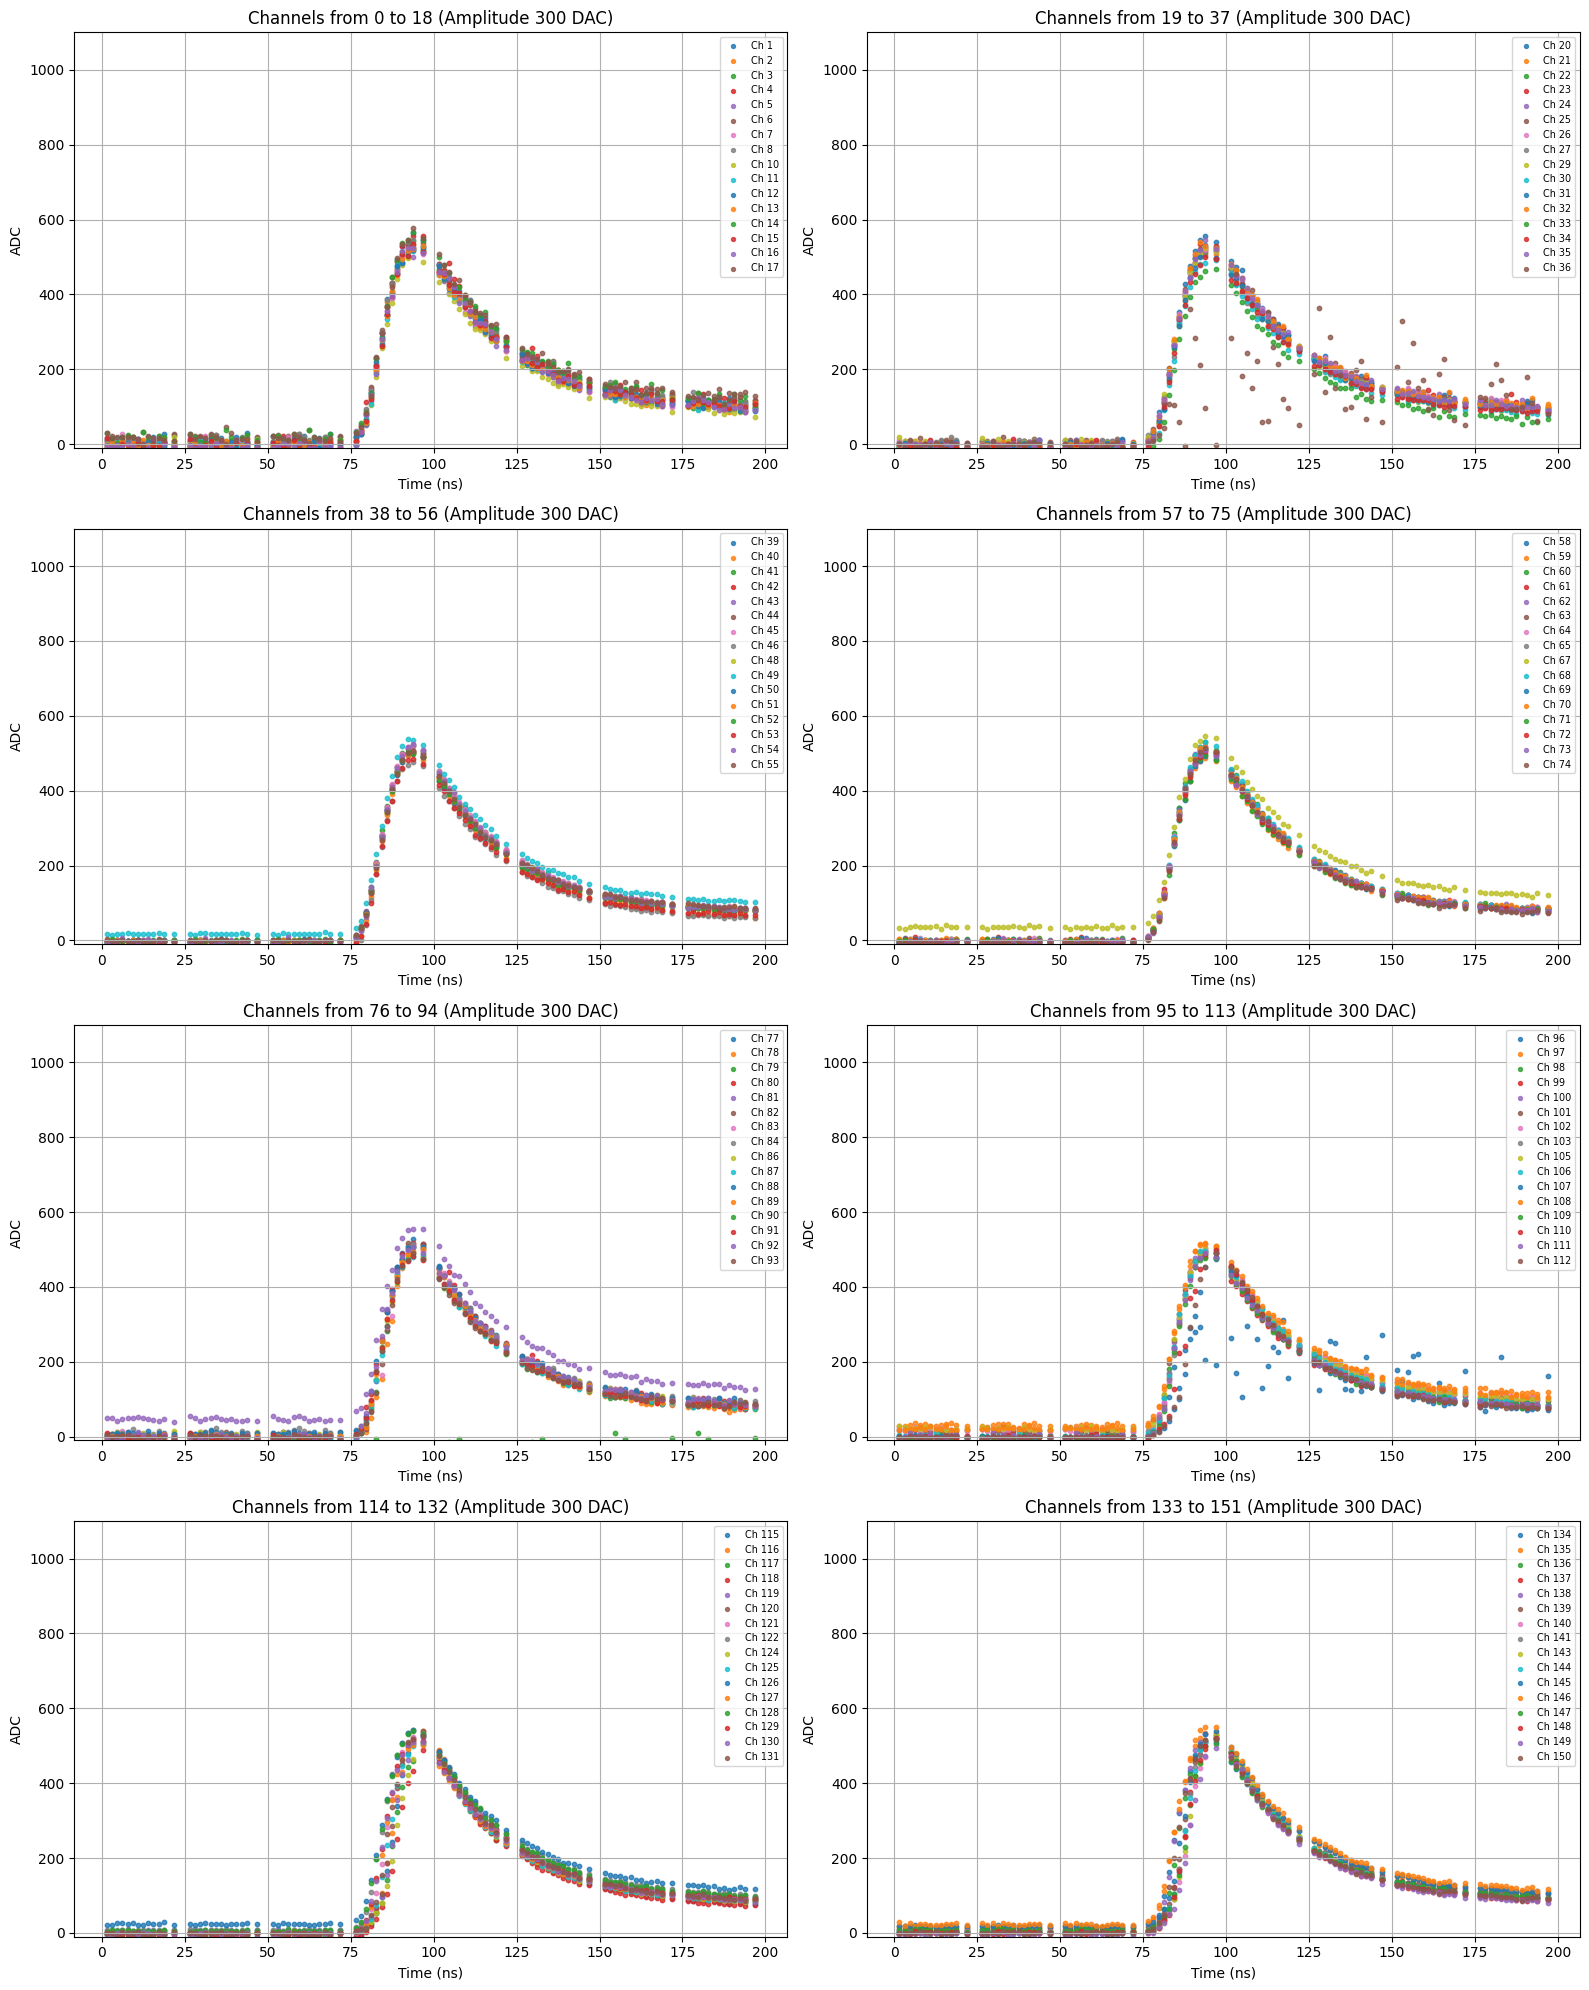

In [ ]:
# Specify the amplitude you want to plot
injected_amplitude = 300  # Replace with the desired amplitude

# Extract the files for the specified amplitude
run_files = all_dirs.get(injected_amplitude, {})

# Check if the amplitude is valid<
if not run_files:
    print(f"No files found for amplitude {injected_amplitude}")
    exit()

# Define sets of channels to skip
dead_channels = {0, 37, 38, 75, 76, 113, 114, 151}
calibration_channels = {19, 57, 95, 133}
notConnected_channels = {9, 18, 28, 47, 56, 66, 85, 94, 104, 123, 132, 142}

# Total groups
num_groups = 8
files_per_group = 19
pedestals = 0

# Create a figure with 4x2 subplots
fig, axs = plt.subplots(4, 2, figsize=(16, 20))
axs = axs.flatten()

pedestals = 80

# Process each channel
for group_id in range(num_groups):
    ax = axs[group_id]
    first_channel = group_id * files_per_group
    last_channel = first_channel + files_per_group
    marker_index = 0

    for channel in range(first_channel, last_channel):
        # Skip unwanted channels
        if channel in dead_channels or channel in calibration_channels or channel in notConnected_channels:
            continue
        
        # Collect data for the current channel across all 5 runs
        all_runs_data = []

        for run_number, file_path in run_files.items():
            if not os.path.exists(file_path):
                print(f"File not found: {file_path}")
                continue
            
            # Read the data file
            df = pd.read_csv(file_path)
            df.columns = df.columns.str.strip()
            
            # Filter by channel and remove unwanted phases
            channel_data = df[(df['Channel'] == channel) & (~df['Phase'].isin([4, 6, 7]))]

            if not channel_data.empty:
                # Subtract pedestal and collect data
                channel_data.loc[:, 'ADC'] -= pedestals
                all_runs_data.append(channel_data[['Time', 'ADC']])
        
        # If data was collected for all runs, compute the mean
        if all_runs_data:
            # Concatenate all runs for this channel
            combined_data = pd.concat(all_runs_data)
            
            # Compute the mean ADC for each time point
            mean_data = combined_data.groupby('Time')['ADC'].mean().reset_index()
            
            # Plot the mean waveform
            # if channel == 116:
            #     ax.scatter(mean_data['Time'], mean_data['ADC'], label=f'Ch {channel}', alpha=0.8, s=10, color='red')
            # else:
            #     continue
            ax.scatter(mean_data['Time'], mean_data['ADC'], label=f'Ch {channel}', alpha=0.8, s=10)
            marker_index += 1

    ax.set_title(f'Channels from {first_channel} to {last_channel - 1} (Amplitude {injected_amplitude} DAC)')
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('ADC')
    ax.set_ylim(-10, 1100)
    ax.grid(True)
    ax.legend(fontsize='x-small', markerscale=0.9)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#fig.savefig(f'/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/images/FPGA_{fpga_adc}_pb{pb_adc}/04_MeanConnectedChannelsAllRuns_fpga{fpga_adc}-pb{pb_adc}_{injected_amplitude}DAC.png')


## Plot the TOT - 12b all channels (mean value of runs)

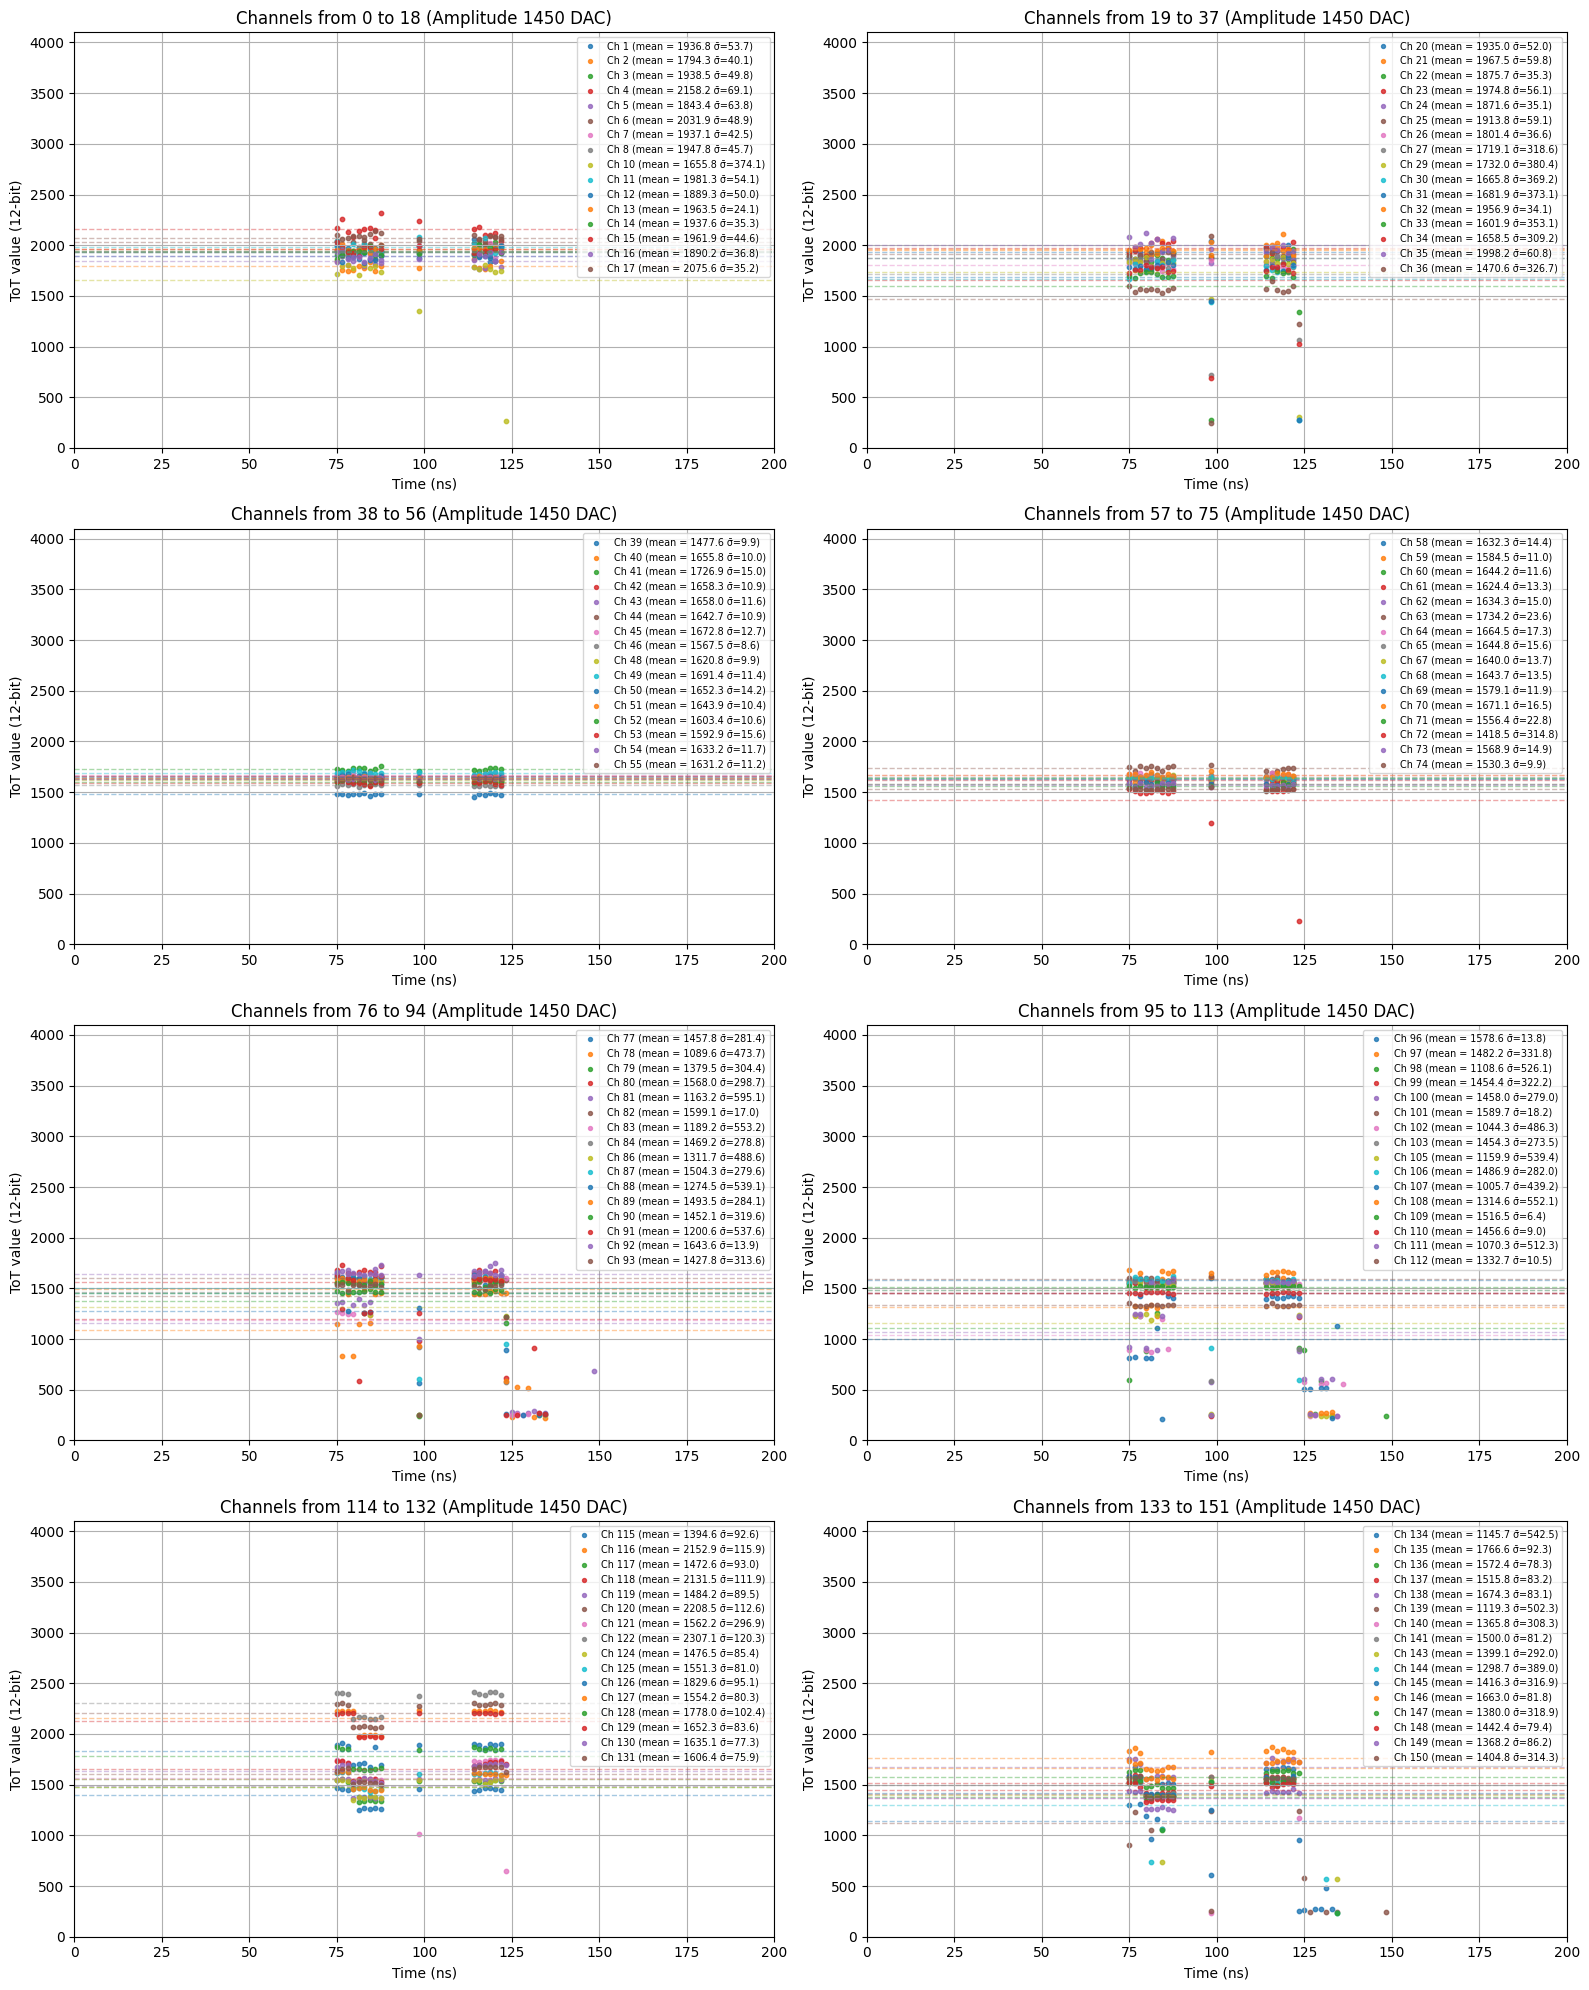


🟢 Approved ToT Channels (96 channels):
1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 32, 34, 35, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 73, 74, 77, 80, 82, 84, 87, 89, 92, 96, 100, 101, 103, 106, 109, 110, 112, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 135, 136, 137, 138, 141, 146, 148, 149

🔴 Discarded ToT Channels (32 channels):
10, 29, 30, 31, 33, 36, 72, 78, 79, 81, 83, 86, 88, 90, 91, 93, 97, 98, 99, 102, 105, 107, 108, 111, 134, 139, 140, 143, 144, 145, 147, 150

Percentage of Approved Linearity Channels: 75.00%


In [ ]:
# Specify the amplitude you want to plot
injected_amplitude = 1450  # Replace with the desired amplitude

# Extract the files for the specified amplitude
run_files = all_dirs_tot.get(injected_amplitude, {})

# Check if the amplitude is valid
if not run_files:
    print(f"No files found for amplitude {injected_amplitude}")
    exit()

# Define sets of channels to skip
dead_channels = {0, 37, 38, 75, 76, 113, 114, 151}
calibration_channels = {19, 57, 95, 133}
notConnected_channels = {9, 18, 28, 47, 56, 66, 85, 94, 104, 123, 132, 142}

# Total groups
num_groups = 8
files_per_group = 19
pedestals = 0

# Create a figure with 4x2 subplots
fig, axs = plt.subplots(4, 2, figsize=(16, 20))
axs = axs.flatten()

pedestals = 80

approved_tot_channels = []
discarded_tot_channels = []

# Process each channel
for group_id in range(num_groups):
    ax = axs[group_id]
    first_channel = group_id * files_per_group
    last_channel = first_channel + files_per_group
    marker_index = 0

    for channel in range(first_channel, last_channel):
        # Skip unwanted channels
        if channel in dead_channels or channel in calibration_channels or channel in notConnected_channels:
            continue
        
        # Collect data for the current channel across all 5 runs
        all_runs_data = []

        for run_number, file_path in run_files.items():
            if not os.path.exists(file_path):
                print(f"File not found: {file_path}")
                continue
            
            # Read the data file
            df = pd.read_csv(file_path)
            df.columns = df.columns.str.strip()
            
            # Filter by channel and remove unwanted phases
            #channel_data = df[(df['Channel'] == channel) & (~df['Phase'].isin([4, 6, 7]))]
            channel_data = df[(df['Channel'] == channel)]

            if not channel_data.empty:
                # Subtract pedestal and collect data
                channel_data.loc[:, 'TOT_12bit'] -= pedestals
                all_runs_data.append(channel_data[['Time', 'TOT_12bit']])
        
        # If data was collected for all runs, compute the mean
        if all_runs_data:
            # Concatenate all runs for this channel
            combined_data = pd.concat(all_runs_data)
            
            # Compute the mean ToT for each time point
            mean_data = combined_data.groupby('Time')['TOT_12bit'].mean().reset_index()
            #print(mean_data)
            std_data = combined_data.groupby('Time')['TOT_12bit'].std().reset_index()

            
            # Plot the mean waveform
            # Compute standard deviation of the mean waveform
            # Exclude zero values before computing standard deviation
            non_zero_mean_tot = mean_data[mean_data['TOT_12bit'] != -pedestals]['TOT_12bit']
            mean_std = non_zero_mean_tot.std()
            tot_mean = non_zero_mean_tot.mean()

            # Plot the mean waveform and add std to the legend
            #ax.scatter(mean_data['Time'], mean_data['TOT_12bit'], label=f'Ch {channel} (σ̄={mean_std:.1f})', alpha=0.8, s=10)

            # Plot the mean waveform and capture the color
            points = ax.scatter(mean_data['Time'], mean_data['TOT_12bit'],
                                label=f'Ch {channel} (mean = {tot_mean:.1f} σ̄={mean_std:.1f})',
                                alpha=0.8, s=10)

            color = points.get_facecolor()[0]  # RGBA color

            # Draw horizontal line in same color, less opaque
            ax.axhline(y=tot_mean, color=color, linestyle='--', linewidth=1, alpha=0.4)
            '''ax.text(x=ax.get_xlim()[0] + 2, y=tot_mean + 10,
                    s=f"μ={tot_mean:.1f}", fontsize=7, color=color, alpha=0.6)'''

            if mean_std*100/tot_mean <= 20:
                approved_tot_channels.append(channel)
            else:
                discarded_tot_channels.append(channel)
            
            #ax.errorbar(mean_data['Time'], mean_data['TOT_12bit'], yerr=std_data['TOT_12bit'], fmt='', linestyle="None")
            marker_index += 1

    ax.set_title(f'Channels from {first_channel} to {last_channel - 1} (Amplitude {injected_amplitude} DAC)')
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('ToT value (12-bit)') 
    ax.set_ylim(0, 4100)
    ax.set_xlim(0, 200)
    ax.grid(True)
    ax.legend(fontsize='x-small', markerscale=0.9)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#fig.savefig(f'/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/images/FPGA_{fpga_tot}_pb{pb_tot}/04_MeanConnectedChannelsAllRuns_tot_12bit_fpga{fpga_tot}-pb{pb_tot}_{injected_amplitude}DAC.png')

# Output function to print channel lists
def print_channel_list(label, channels):
    print(f"\n{label} ({len(channels)} channels):")
    print(", ".join(str(int(c)) for c in sorted(channels)))
# Display the results
print_channel_list("🟢 Approved ToT Channels", approved_tot_channels)
print_channel_list("🔴 Discarded ToT Channels", discarded_tot_channels)

# Percerntage of approved channels
total_channels = 128
percentage_good = (len(approved_tot_channels) / total_channels) * 100 if total_channels > 0 else 0
print(f"\nPercentage of Approved Linearity Channels: {percentage_good:.2f}%")


## Extract adc peak per amplitude ADC

In [ ]:
def extract_peaks(all_dirs, channel, pedestals):
    amplitudes_list = [] 
    peaks_list = [] 
    
    for amplitude, runs in all_dirs.items():
        for run_file in runs.values():
            if os.path.exists(run_file):
                # Read the CSV file
                df = pd.read_csv(run_file)
                df.columns = df.columns.str.strip()
                
                # Check for required columns
                if 'Channel' in df.columns and 'ADC' in df.columns and 'Phase' in df.columns:
                    # Filter by the specified channel and exclude unwanted phases
                    channel_data = df[(df['Channel'] == channel) & (~df['Phase'].isin([4, 6, 7]))]
                    
                    # Extract the peak value if the channel data is not empty
                    if not channel_data.empty:
                        peak = channel_data['ADC'].max()-pedestals
                        amplitudes_list.append(amplitude)
                        peaks_list.append(peak)
                else:
                    print(f"Required columns missing in {run_file}")
            else:
                print(f"File not found: {run_file}")
    
    return amplitudes_list, peaks_list


## Extract adc peak per amplitude dynamic pedestals

In [ ]:
def extract_peaks_pedestals_dynamic(all_dirs, channel, pb, pedestal_files, default_pedestals):
    if default_pedestals is None:
        default_pedestals = {}

    if pb not in pedestal_files:
        raise ValueError(f"No pedestal file provided for protoboard {pb}")
    
    pedestal_file_path = pedestal_files[pb]
    if not os.path.exists(pedestal_file_path):
        raise FileNotFoundError(f"Pedestal file for protoboard {pb} not found: {pedestal_file_path}")

    # Load the pedestal file for the current protoboard
    pedestal_df = pd.read_csv(pedestal_file_path)
    pedestal_df.columns = pedestal_df.columns.str.strip()
    pedestal_df = pedestal_df[~pedestal_df['Phase'].isin([4, 6, 7])]
    pedestal_df = pedestal_df[pedestal_df['Channel'] == channel]

    # Check if pedestal data exists for the channel
    pedestal_map = {}
    use_default = False
    default_pedestal = None

    if pedestal_df.empty:
        if pb in default_pedestals and channel in default_pedestals[pb]:
            default_pedestal = default_pedestals[pb][channel]
            use_default = True
            print(f"No pedestal data found for channel {channel} on protoboard {pb}, using calibration pedestal value of {default_pedestal}.")
        else:
            print(f"No pedestal data found for channel {channel} on protoboard {pb}, and no default value specified.")
            return [], []
    else:
        pedestal_map = pedestal_df.set_index('Phase')['ADC'].to_dict()

    amplitudes_list = [] 
    peaks_list = [] 
    
    for amplitude, runs in all_dirs.items():
        for run_file in runs.values():
            if os.path.exists(run_file):
                df = pd.read_csv(run_file)
                df.columns = df.columns.str.strip()

                if {'Channel', 'ADC', 'Phase'}.issubset(df.columns):
                    channel_data = df[(df['Channel'] == channel) & (~df['Phase'].isin([4, 6, 7]))]

                    if not channel_data.empty:
                        if use_default:
                            corrected_adc = channel_data['ADC'] - default_pedestal
                        else:
                            corrected_adc = channel_data.apply(
                                lambda row: row['ADC'] - pedestal_map.get(row['Phase'], 80),
                                axis=1
                            )

                        peak = corrected_adc.max()
                        amplitudes_list.append(amplitude)
                        peaks_list.append(peak)
                else:
                    print(f"Required columns missing in {run_file}")
            else:
                print(f"File not found: {run_file}")
    
    return amplitudes_list, peaks_list



### Extract tot peak per amplitude

In [ ]:
def extract_tot_peak(all_dirs, channel, pedestals):
    amplitudes_list = [] 
    peaks_list = [] 
    
    for amplitude, runs in all_dirs.items():
        for run_file in runs.values():
            if os.path.exists(run_file):
                # Read the CSV file
                df = pd.read_csv(run_file)
                df.columns = df.columns.str.strip()
                
                # Check for required columns
                if 'Channel' in df.columns and 'ADC' in df.columns and 'TOT_12bit' in df.columns and 'Phase' in df.columns:
                    # Filter by the specified channel and exclude unwanted phases
                    channel_data = df[(df['Channel'] == channel) ]#& (~df['Phase'].isin([4, 6, 7]))]
                    
                    # Extract the peak value if the channel data is not empty
                    if not channel_data.empty:
                        peak = channel_data['TOT_12bit'].max()-pedestals
                        amplitudes_list.append(amplitude)
                        peaks_list.append(peak)
                    else:
                        print('Channel data empty')
                else:
                    print(f"Required columns missing in {run_file}")
            else:
                print(f"File not found: {run_file}")
    
    return amplitudes_list, peaks_list


### Extract tot mean per amplitude

In [ ]:
def extract_tot_mean(all_dirs, channel, pedestals):
    amplitudes_list = [] 
    means_list = [] 
    
    for amplitude, runs in all_dirs.items():
        for run_file in runs.values():
            if os.path.exists(run_file):
                # Read the CSV file
                df = pd.read_csv(run_file)
                df.columns = df.columns.str.strip()
                
                # Check for required columns
                if {'Channel', 'ADC', 'TOT_12bit', 'Phase'}.issubset(df.columns):
                    # Filter by the specified channel
                    channel_data = df[(df['Channel'] == channel) & (~df['Phase'].isin([4, 6, 7]))]
                    print(df[df['Channel'] == channel]['Phase'].unique())
                    # Ensure TOT_12bit is not zero
                    if channel_data.empty:
                        print(f"No data for channel {channel} in {run_file}")
                        continue
                    
                    # Exclude TOT_12bit == 0
                    valid_tot = channel_data[channel_data['TOT_12bit'] != 0]['TOT_12bit']
                    
                    # Compute the mean if there are valid entries
                    if not valid_tot.empty:
                        mean_val = valid_tot.mean() - pedestals
                        amplitudes_list.append(amplitude)
                        means_list.append(mean_val)
                    else:
                        print(f"No valid TOT_12bit data (non-zero) in {run_file} for channel {channel}")
                else:
                    print(f"Required columns missing in {run_file}")
            else:
                print(f"File not found: {run_file}")
    
    return amplitudes_list, means_list


### Peak ADC vs DAC of an specific channel

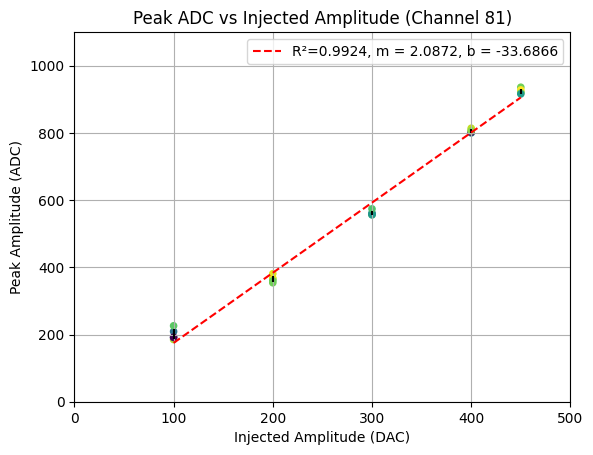

In [ ]:
# Define the channel to plot 
channel = 81
pedestals = 80
amplitudes, peaks = extract_peaks(all_dirs, channel, pedestals) 

amplitudes_array = np.array(amplitudes) 
#amplitudes_pC = (amplitudes_array - 193.03)/49 #pC

peaks_np = np.array(peaks)
means = peaks_np.reshape(-1,5).mean(axis=1)
std_dev = peaks_np.reshape(-1,5).std(axis=1)

# Linear regression 
slope, intercept, r_value, p_value, std_err = linregress(amplitudes_array, peaks) 

# Plotting 
colors = np.random.rand(25)

fig = plt.figure() 
plt.scatter(amplitudes_array, peaks, s=20, c=colors)
#plt.scatter(np.array([100, 200, 300, 400, 450]), means, s=20, c=colors) 
plt.errorbar(np.array([100, 200, 300, 400, 450]), means, yerr=std_dev, fmt='', linestyle="None", c='black')
plt.xlabel('Injected Amplitude (DAC)') 
plt.plot(amplitudes_array, slope*amplitudes_array + intercept, linestyle="--", color='red', label=f'R²={r_value**2:.4f}, m = {slope:.4f}, b = {intercept:.4f}') 
plt.ylabel('Peak Amplitude (ADC)') 
plt.title(f'Peak ADC vs Injected Amplitude (Channel {channel})') 
plt.ylim(0,1100)
plt.xlim(0,500)
plt.grid(True)
plt.legend()
#fig.savefig(f'/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/images/FPGA_{fpga}_pb{pb}/05_Peaks-Ch{channel}-{fpga}-pb{pb}.png')
plt.show() 


[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]
[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]
[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]
[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]
[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]
[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]
[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]
[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]
[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]
[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]
[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]
[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]
[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]
[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]
[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]
[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]
[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]
[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]
[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]
[ 7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6]


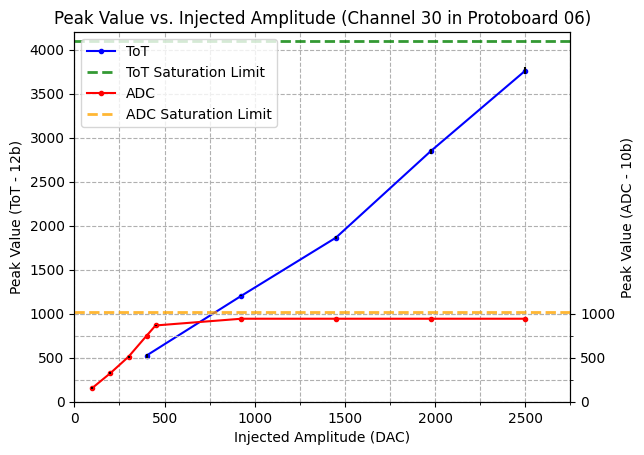

In [ ]:
# Pedestal files for each protoboard
pedestal_file_path = {'01': '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/0dac/inj_adc_samples_208_pb01_76I_0_1.csv', 
                      '008': '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/0dac/inj_adc_samples_209_pb008_76I_0_1.csv',
                      '06': '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/0dac/inj_adc_samples_210_pb06_76I_0_1.csv'}

# Default pedestal values for each protoboard from the pedestal calibration files
default_pedestals = {'01': {79: 35, 83: 50, 115: 80, 116: 76, 117: 75},
                     '008': {},
                     '06': {}}

# Define the channel to plot 
channel = 30
pedestals = 80
amplitudes_tot, peaks_tot = extract_tot_mean(all_dirs_tot, channel, pedestals=0)
amplitudes_adc, peaks_adc = extract_peaks_pedestals_dynamic(all_dirs, channel, pb=pb_adc, pedestal_files=pedestal_file_path, default_pedestals=default_pedestals)
amplitudes_adc_over_450, peaks_adc_over_450 = extract_peaks(all_dirs_tot, channel, pedestals)

amplitudes_array = np.array(amplitudes_tot)
amplitudes_adc_array = np.array(amplitudes_adc) 
#amplitudes_pC = (amplitudes_array - 193.03)/49 #pC

peaks_tot_np = np.array(peaks_tot)
means_tot = peaks_tot_np.reshape(-1,5).mean(axis=1)
std_dev_tot = peaks_tot_np.reshape(-1,5).std(axis=1)

peaks_adc_np = np.array(peaks_adc)
means_adc = peaks_adc_np.reshape(-1,5).mean(axis=1)
std_dev_adc = peaks_adc_np.reshape(-1,5).std(axis=1)

peaks_adc_over_450_np = np.array(peaks_adc_over_450)
means_adc_over_450 = peaks_adc_over_450_np.reshape(-1,5).mean(axis=1)
std_dev_adc_over_450 = peaks_adc_over_450_np.reshape(-1,5).std(axis=1)

means_adc_all = np.concatenate((means_adc, means_adc_over_450[1:]), axis=0)
std_dev_adc_all = np.concatenate((std_dev_adc, std_dev_adc_over_450[1:]), axis=0)

# Linear regression 
#slope, intercept, r_value, p_value, std_err = linregress(amplitudes_array, peaks) 

# Plotting 
colors = np.random.rand(5)

fig, ax1 = plt.subplots()
line1, = ax1.plot(np.array([400, 925, 1450, 1975, 2500]), means_tot, c='blue', marker=".", label = 'ToT')
ax1.errorbar(np.array([400, 925, 1450, 1975, 2500]), means_tot, yerr=std_dev_tot, fmt='', linestyle="None", c='black')
ax1.set_xlabel('Injected Amplitude (DAC)') 
ax1.set_ylabel('Peak Value (ToT - 12b)') 
ax1.set_ylim(0,4200)
ax1.set_xlim(0,2750)
#ax1.grid(True)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(250))

ax1.grid(True, which='both', axis='both', linestyle = '--')

ax2 = ax1.twinx()

line2, = ax2.plot(np.array([100, 200, 300, 400, 450, 925, 1450, 1975, 2500]), means_adc_all, c='red', marker='.', label = 'ADC')
ax2.errorbar(np.array([100, 200, 300, 400, 450, 925, 1450, 1975, 2500]), means_adc_all, yerr=std_dev_adc_all, fmt='', linestyle="None", c='black')
ax2.set_ylabel('Peak Value (ADC - 10b)')
ax2.set_ylim(0,4200)

#ticks_to_show = range(0, 1024, 200)
#ax2.set_yticks(ticks_to_show)
#ax2.set_yticklabels(['' for _ in ticks_to_show])

minor_ticks = list(range(0,1024,250))
major_ticks = list(range(0,1024,500))

ax2.set_yticks(major_ticks)
ax2.set_yticks(minor_ticks, minor=True)

ax2.yaxis.grid(True, which='both', linestyle='--')

hline2 = ax2.axhline(y=1024, color='orange', linestyle='--', linewidth = 2, alpha=0.8, label = 'ADC Saturation Limit')
hline1 = ax1.axhline(y=4096, color='green', linestyle='--', linewidth = 2, alpha=0.8, label = 'ToT Saturation Limit')

plt.title(f'Peak Value vs. Injected Amplitude (Channel {channel} in Protoboard {pb_tot})')
lines = [line1, hline1, line2, hline2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')
plt.show() 

#fig.savefig(f'/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/images/ADC_TOT_Range-Ch{channel}-{fpga_adc}-{fpga_tot}-pb{pb_tot}.png')


In [ ]:
amplitudes_array


array([100, 100, 100, 100, 100, 200, 200, 200, 200, 200, 300, 300, 300,
       300, 300, 400, 400, 400, 400, 400, 450, 450, 450, 450, 450])

### Print all peaks in channels and organize them in groups of 16

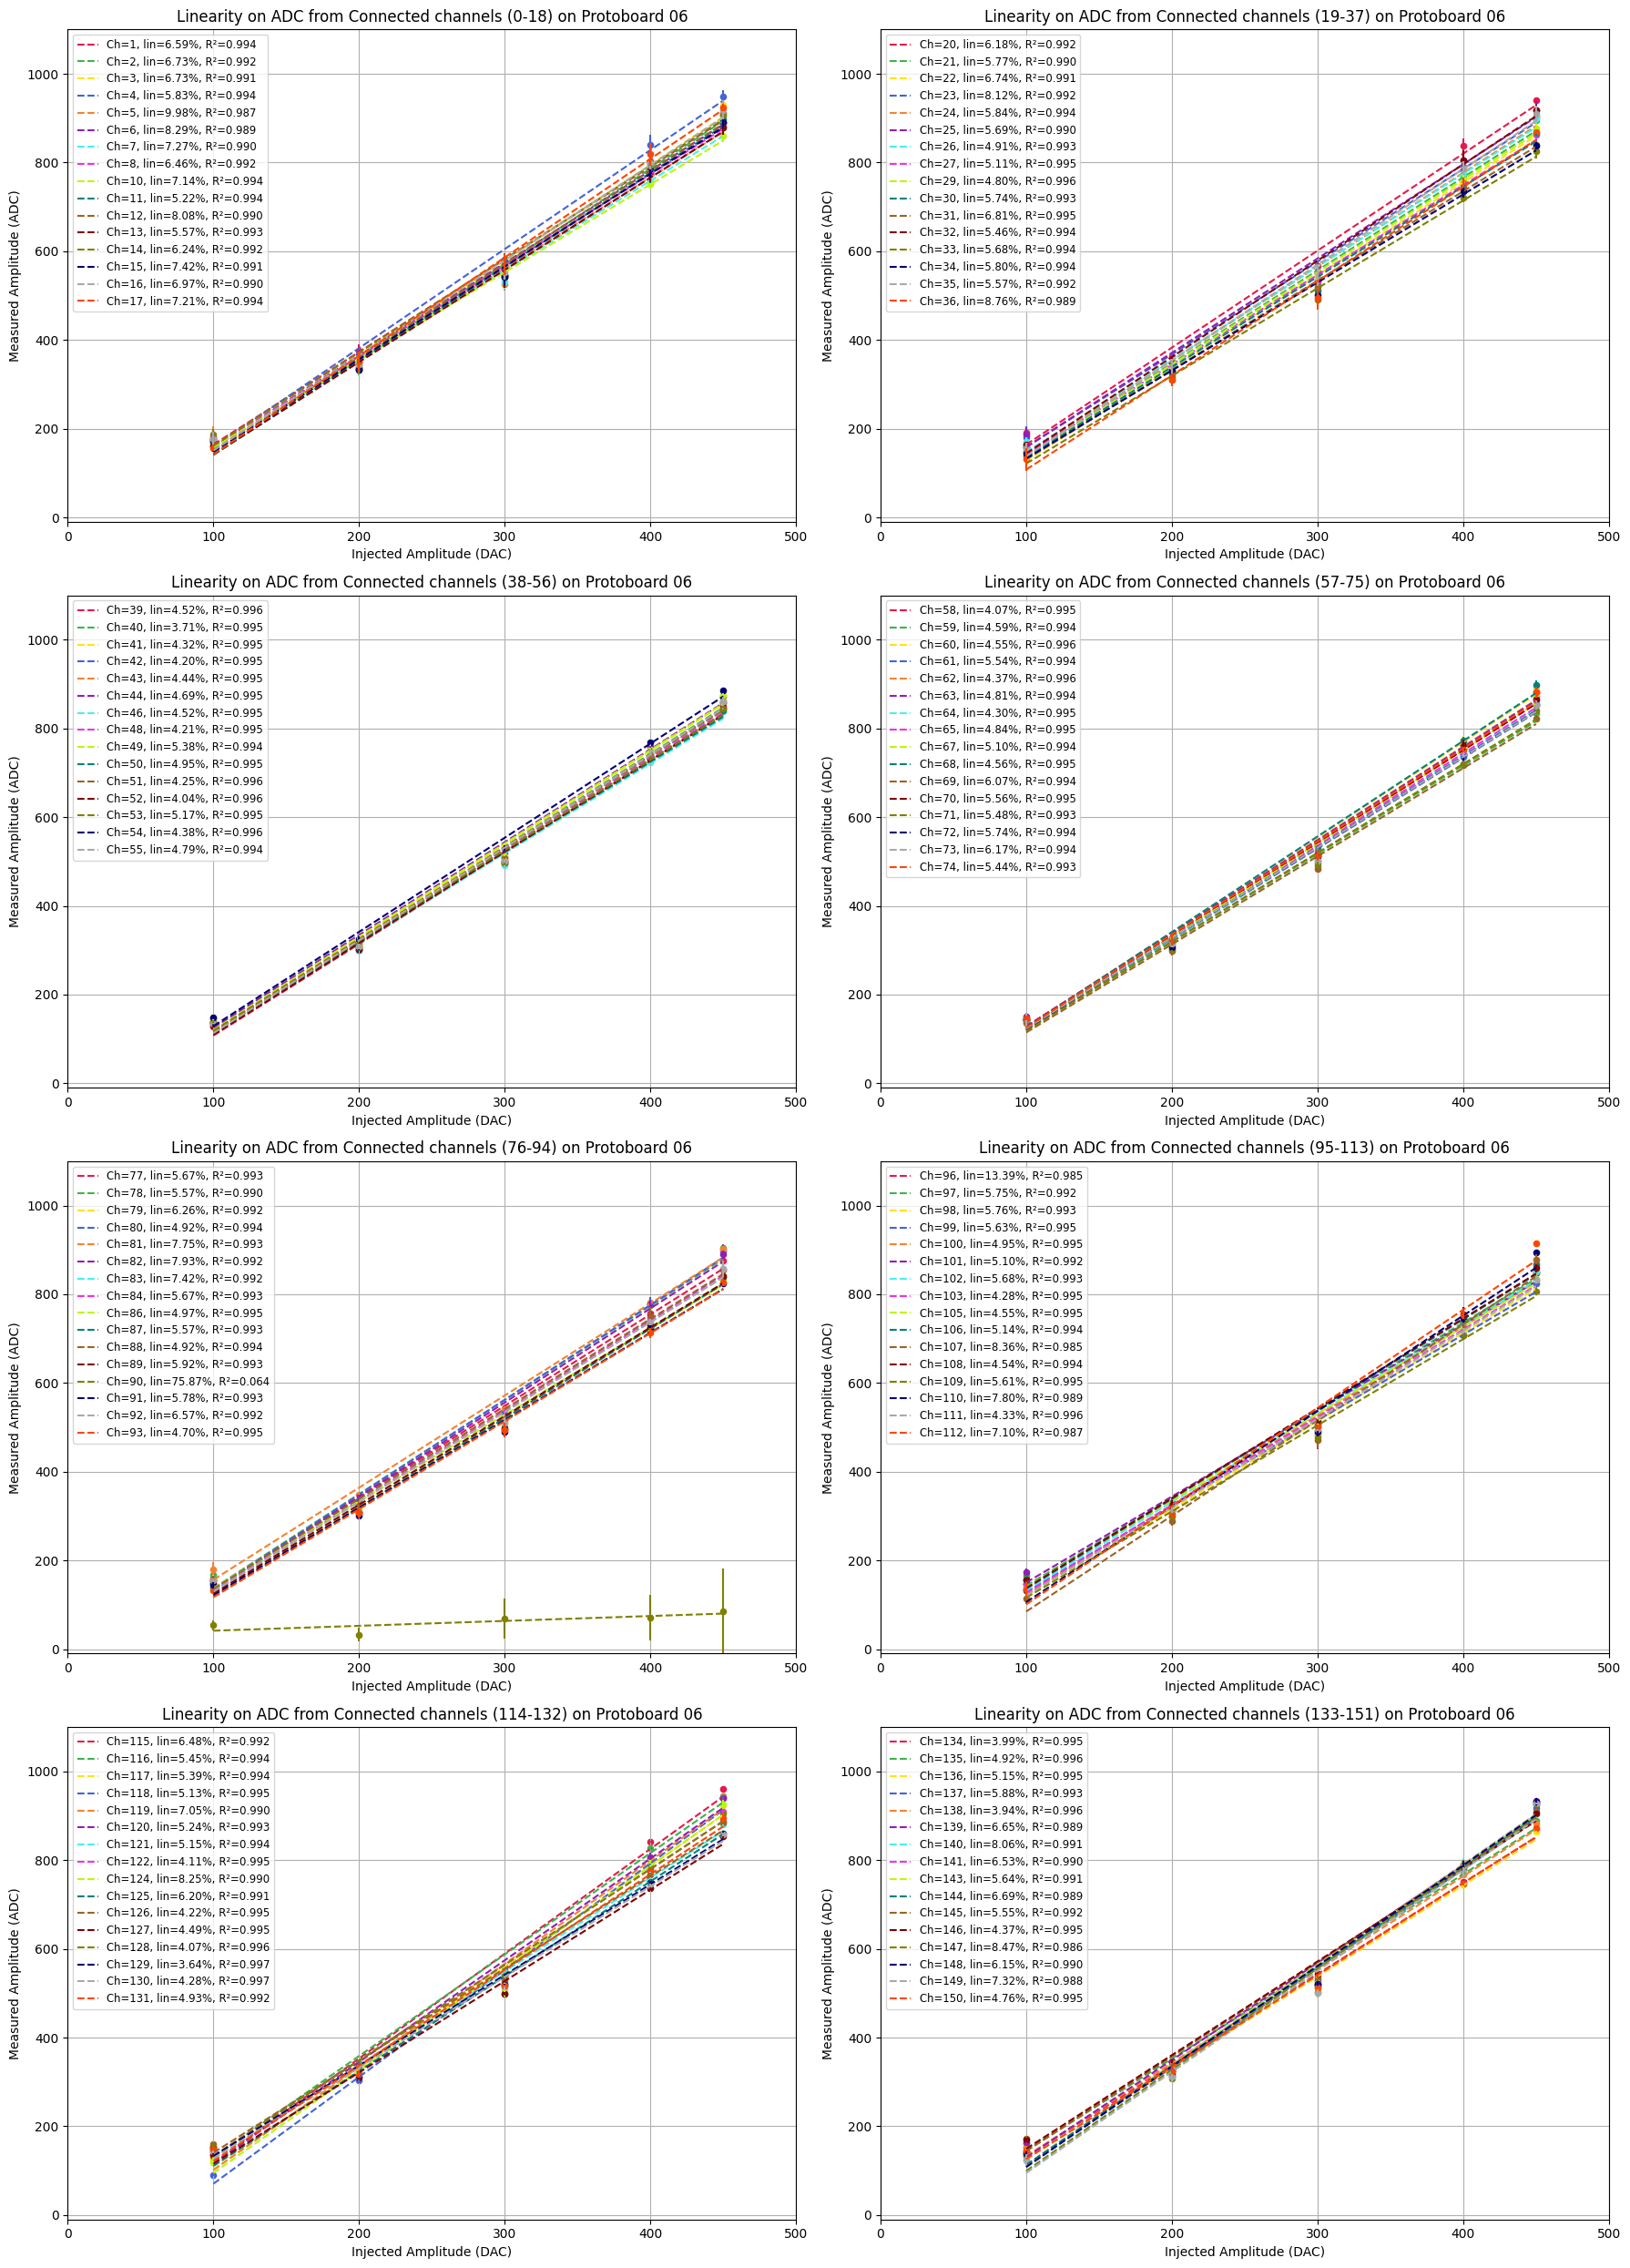


🟢 Good Linearity Channels (124 channels):
1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 39, 40, 41, 42, 43, 44, 46, 48, 49, 50, 51, 52, 53, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 91, 92, 93, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150

🔴 Bad Linearity Channels (3 channels):
36, 90, 96

Percentage of Good Linearity Channels: 96.88%

Channel R² values:
Channel 1: R² = 0.994, linearity = 4.76%
Channel 2: R² = 0.992, linearity = 4.76%
Channel 3: R² = 0.991, linearity = 4.76%
Channel 4: R² = 0.994, linearity = 4.76%
Channel 5: R² = 0.987, linearity = 4.76%
Channel 6: R² = 0.989, linearity = 4.76%
Channel 7: R² = 0.99, linearity = 4.76%
Channel 8: R² = 0.992,

In [ ]:
#sns.set_theme()
plt.style.use('default')
# Create a figure with 4x2 subplots 
fig, axs = plt.subplots(4, 2, figsize=(18, 25)) 
axs = axs.flatten() 

# Marker styles to cycle through 
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'X', '1', '2', '3', '4', '|'] 

line_colors = [
    "#e6194b",  # Red
    "#3cb44b",  # Green
    "#ffe119",  # Yellow
    "#4363d8",  # Blue
    "#f58231",  # Orange
    "#911eb4",  # Purple
    "#46f0f0",  # Cyan
    "#f032e6",  # Magenta
    "#bcf60c",  # Lime
    "#008080",  # Teal
    "#9a6324",  # Brown
    "#800000",  # Maroon
    "#808000",  # Olive
    "#000075",  # Navy
    "#a9a9a9",  # Dark Gray
    "#ff4500",  # Orange Red
    "#228b22",  # Forest Green
    "#1e90ff",  # Dodger Blue
    "#8b008b",  # Dark Magenta
]


# Define sets of channels to skip 
dead_channels = {0, 37, 38, 75, 76, 113, 114, 151}
calibration_channels = {19, 57, 95, 133}
notConnected_channels = {9, 18, 28, 47, 56, 66, 85, 94, 104, 123, 132, 142}

# Discarded channels for each protoboard. Channels that has an unstable behavior and should not be considered for the linearity test.
discarded_channels_dict = {
    '01': {20, 25, 43, 52, 127, 139},  # Protoboard 01
    '06': {36, 90, 96},  # Protoboard 06
    '008': {}  # Protoboard 008
}

# Total groups 
num_groups = 8 
files_per_group = 19

colors = np.random.rand(19)

# Pedestal files for each protoboard
pedestal_file_path = {'01': '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/0dac/inj_adc_samples_208_pb01_76I_0_1.csv', 
                      '008': '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/0dac/inj_adc_samples_209_pb008_76I_0_1.csv',
                      '06': '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/0dac/inj_adc_samples_210_pb06_76I_0_1.csv'}

# Default pedestal values for each protoboard from the pedestal calibration files
default_pedestals = {'01': {79: 35, 83: 50, 115: 80, 116: 76, 117: 75},
                     '008': {},
                     '06': {}}

# Linearity Test
acceptance_value = 0.98  # R² threshold for good linearity
good_linearity_channels = []
bad_linearity_channels = []

channel_r2_dict = {} # Dictionary to store channel and its R² value

# Loop over 8 groups 
for group_id in range(num_groups):
    j=1
    ax = axs[group_id]  # Select subplot 
    first_channel = group_id * files_per_group 
    last_channel = first_channel + files_per_group 
    marker_index = 0 
    j = 0

    for i in range(first_channel, last_channel): 
        if i in dead_channels or i in notConnected_channels or i in calibration_channels or i == 45: 
            #print(f"Skipping channel: {i}") 
            continue 

        # if i != 52:
        #     continue

        #amplitudes, peaks = extract_peaks(all_dirs, i, pedestals)
        amplitudes, peaks = extract_peaks_pedestals_dynamic(all_dirs, i, pb=pb_adc, pedestal_files=pedestal_file_path, default_pedestals=default_pedestals)

        # Converting amplitude to C 
        amplitudes_array = np.array(amplitudes) 
        #mplitudes_pC = amplitudes_array*2.0752/1000

        # Linear regression 
        slope, intercept, r_value, p_value, std_err = linregress(amplitudes_array, peaks)
        
        # compute deviation
        deviations = peaks - (slope * amplitudes_array + intercept)
        max_deviation = np.max(np.abs(deviations))
        full_scale = np.max(peaks) - np.min(peaks)
        linearity_percentage = max_deviation / full_scale * 100

        # Round r_value to 3 decimal places
        r2 = round(r_value**2, 3)

        channel_r2_dict[i] = r2  # Store the R² value for the channel

        # Compute the mean value in peaks per amplitude
        peaks_np = np.array(peaks)
        means = peaks_np.reshape(-1,5).mean(axis=1)
        std_dev = peaks_np.reshape(-1,5).std(axis=1)
        
        #ax.scatter(amplitudes[4::5], means, s=20, c=line_colors[j % len(line_colors)], marker='o')
        ax.scatter(amplitudes[4::5], means, s=20, marker='o', c=line_colors[j % len(line_colors)])
        ax.errorbar(amplitudes[4::5], means, yerr=std_dev, fmt='', linestyle="None", c=line_colors[j % len(line_colors)])
        #ax.errorbar(amplitudes[4::5], means, yerr=std_dev, fmt='', linestyle="None")
        # R²={r_value**2:.1f}
        ax.plot(amplitudes_array, slope*amplitudes_array + intercept, linestyle="--", color=line_colors[j % len(line_colors)], label=f'Ch={i}, lin={linearity_percentage:.2f}%, R²={r2:.3f}') 
        if r2 >= acceptance_value and i not in discarded_channels_dict.get(pb_adc, set()):
            good_linearity_channels.append(i)
        else:
            bad_linearity_channels.append(i)

        j += 1
        marker_index += 1
        
    ax.set_title(f'Linearity on ADC from Connected channels ({first_channel}-{last_channel - 1}) on Protoboard {pb_adc}') 
    ax.set_xlabel('Injected Amplitude (DAC)') 
    ax.set_ylabel('Measured Amplitude (ADC)') 
    #ax.plot(amp, slope_ideal*amp + intercept_ideal, linestyle="-", color='black', label='Ideal Linearity')
    ax.set_ylim(-10, 1100)
    ax.set_xlim(0,500)
    ax.grid(True) 
    ax.legend(fontsize='small',markerscale=1)
    #ax.legend()

# Adjust layout 
plt.tight_layout() 
plt.show()
#fig.savefig(f'/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/images/FPGA_{fpga_adc}_pb{pb_adc}/06_linearity_adc_pb{pb_adc}.png')

# Output function to print channel lists
def print_channel_list(label, channels):
    print(f"\n{label} ({len(channels)} channels):")
    print(", ".join(str(int(c)) for c in sorted(channels)))
# Display the results
print_channel_list("🟢 Good Linearity Channels", good_linearity_channels)
print_channel_list("🔴 Bad Linearity Channels", bad_linearity_channels)

# Percerntage of good linearity channels
total_channels = 128
percentage_good = (len(good_linearity_channels) / total_channels) * 100 if total_channels > 0 else 0
print(f"\nPercentage of Good Linearity Channels: {percentage_good:.2f}%")

# Output the R² dictionary
print("\nChannel R² values:")
for channel, r2 in sorted(channel_r2_dict.items()):
    print(f"Channel {channel}: R² = {r2}, linearity = {linearity_percentage:.2f}%")


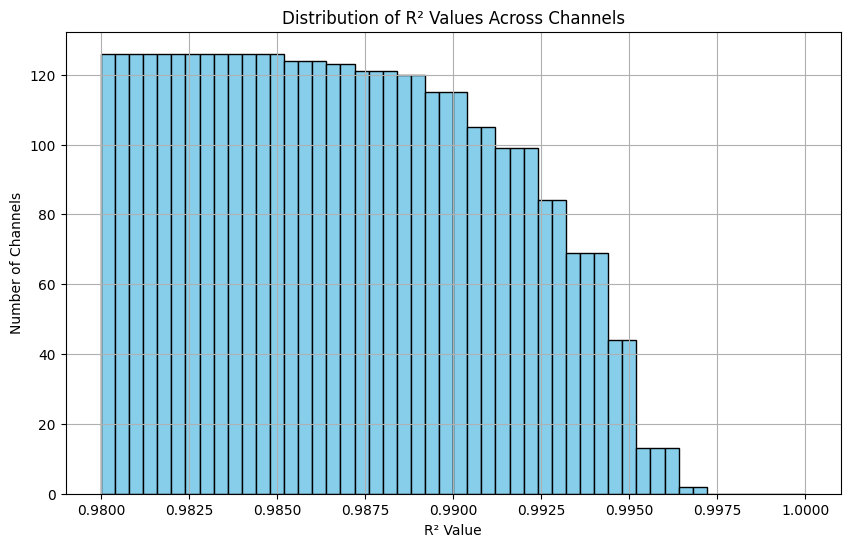

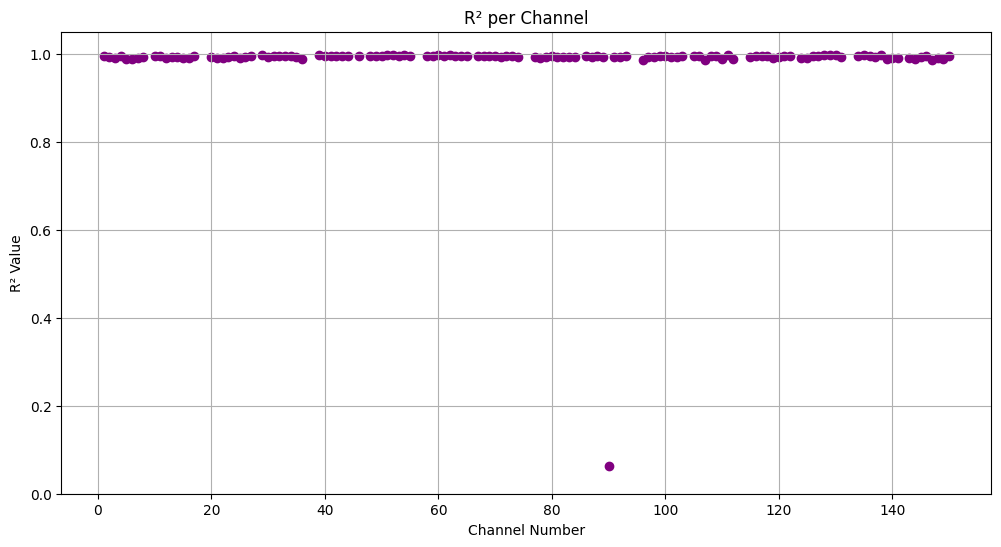

In [ ]:


# Extract data from the dictionary
channels = list(channel_r2_dict.keys())
r2_values = list(channel_r2_dict.values())

# 1. Histogram of R² values
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.hist(r2_values, bins=50, color='skyblue', edgecolor='black', range=(0.98, 1), cumulative=-1)
plt.title('Decreasing Cumulative Distribution of R² Values Across Channels')
plt.xlabel('R² Value')
plt.ylabel('Number of Channels')
#plt.xlim(0.98, 1)
plt.show()

# 2. Scatter plot of R² vs Channel Number
plt.figure(figsize=(12, 6))
plt.scatter(channels, r2_values, color='purple')
plt.title('R² per Channel')
plt.xlabel('Channel Number')
plt.ylabel('R² Value')
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()


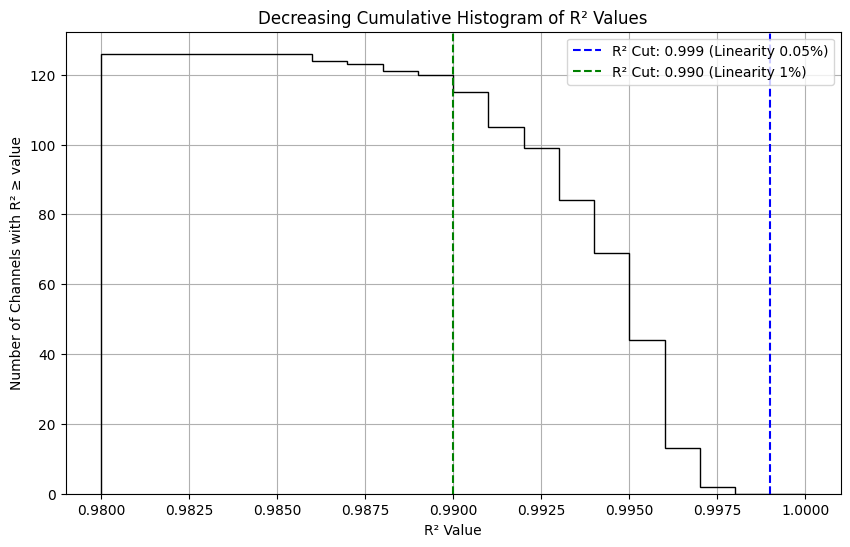

Linearity requirement: 1% → Required R² ≥ 0.99
Channels passing the cut: 115 out of 127 (90.55%)
Channels that pass the cut: [1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 39, 40, 41, 42, 43, 44, 46, 48, 49, 50, 51, 52, 53, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 91, 92, 93, 97, 98, 99, 100, 101, 102, 103, 105, 106, 108, 109, 111, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 134, 135, 136, 137, 138, 140, 141, 143, 145, 146, 148, 150]


In [ ]:
# Example: Desired linearity percentage (input this value as you like)
linearity_percentage = 1 # For example: 0.05 for 0.05% or 1 for 1%

# Calculate the corresponding R² cut
r2_cut = 1.000 - (linearity_percentage / 100)

# Count the number of channels that meet the cut
passing_channels = [ch for ch, r2 in channel_r2_dict.items() if r2 >= r2_cut]
num_passing = len(passing_channels)
total_channels = len(channel_r2_dict)

# Plot the decreasing cumulative histogram
plt.figure(figsize=(10, 6))
plt.hist(r2_values, bins=20, edgecolor='black', range=(0.98, 1), cumulative=-1, histtype='step', linewidth=1)

# Draw the cut line based on linearity percentage
plt.axvline(x=0.999, color='blue', linestyle='--', label=f'R² Cut: 0.999 (Linearity 0.05%)')
plt.axvline(x=r2_cut, color='green', linestyle='--', label=f'R² Cut: {r2_cut:.3f} (Linearity {linearity_percentage}%)')

plt.title('Decreasing Cumulative Histogram of R² Values')
plt.xlabel('R² Value')
plt.ylabel('Number of Channels with R² ≥ value')
plt.grid(True)
plt.legend()
plt.show()

# Print the results
print(f"Linearity requirement: {linearity_percentage}% → Required R² ≥ {r2_cut}")
print(f"Channels passing the cut: {num_passing} out of {total_channels} ({(num_passing/total_channels)*100:.2f}%)")

# Optional: Print the channels that passed
print(f"Channels that pass the cut: {sorted(passing_channels)}")


### Print ToT for channels

File not found: /home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/400dac/inj_adc_samples_209_pb01_76_400_1.csv
File not found: /home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/400dac/inj_adc_samples_209_pb01_76_400_2.csv
File not found: /home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/400dac/inj_adc_samples_209_pb01_76_400_3.csv
File not found: /home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/400dac/inj_adc_samples_209_pb01_76_400_4.csv
File not found: /home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/400dac/inj_adc_samples_209_pb01_76_400_5.csv
File not found: /home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/925dac/inj_adc_samples_209_pb01_76_925_1.csv
File not found: /home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/925dac/inj_adc_samples_209_pb01_76_925_2.csv
File not found: /home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/925dac/inj_adc_sample

ValueError: Inputs must not be empty.

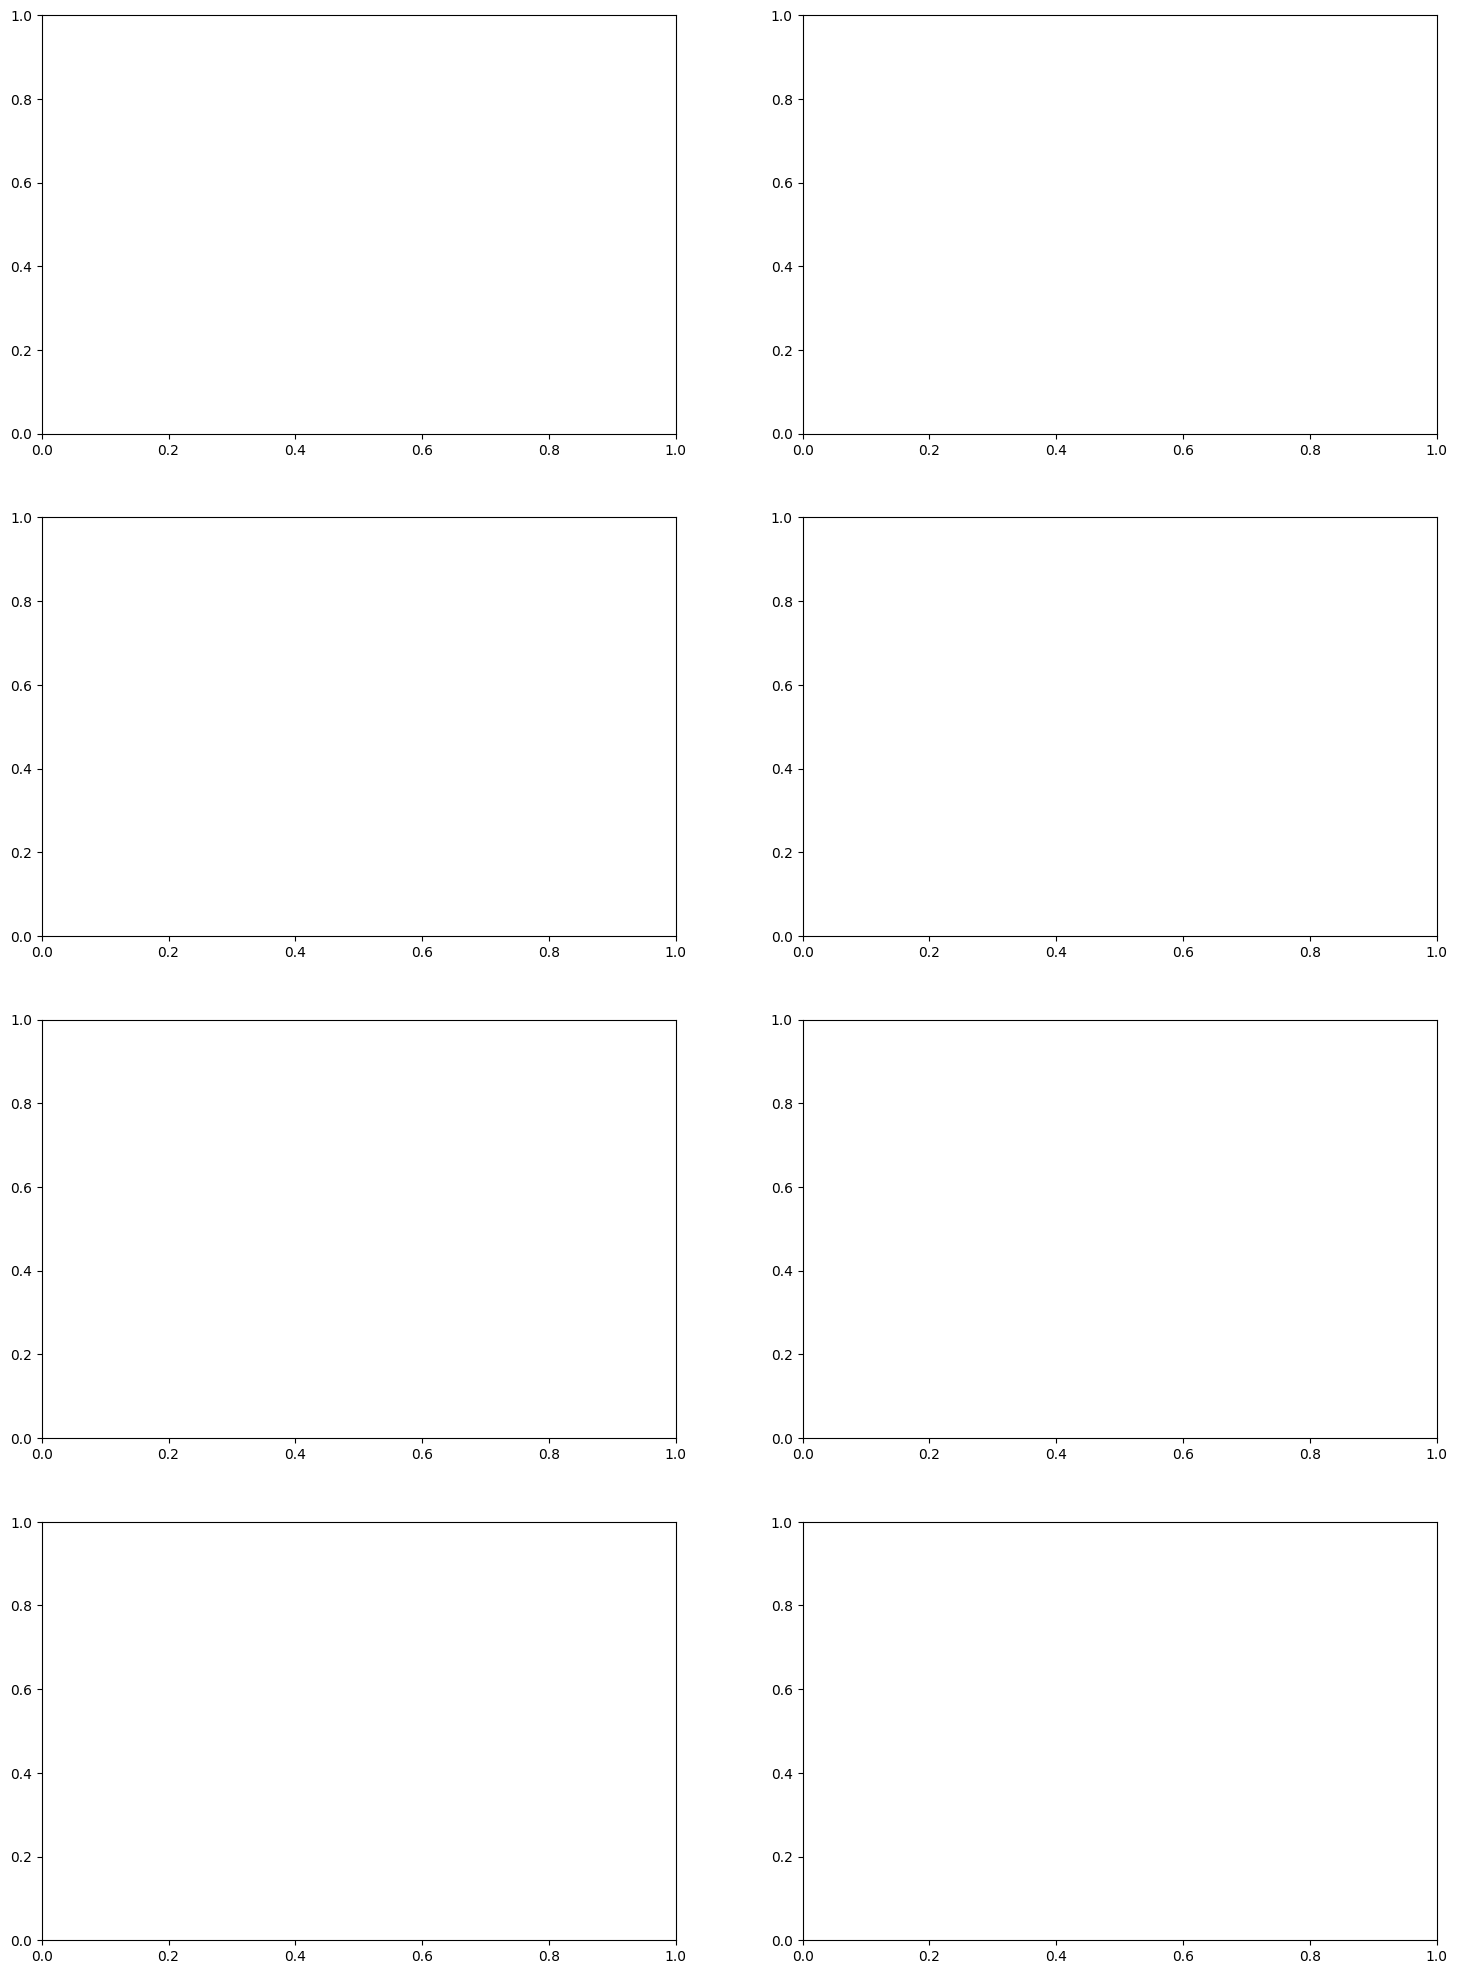

In [ ]:
#sns.set_theme()
plt.style.use('default')
# Create a figure with 4x2 subplots 
fig, axs = plt.subplots(4, 2, figsize=(18, 25)) 
axs = axs.flatten() 

# Marker styles to cycle through 
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'X', '1', '2', '3', '4', '|'] 

line_colors = [
    "#e6194b",  # Red
    "#3cb44b",  # Green
    "#ffe119",  # Yellow
    "#4363d8",  # Blue
    "#f58231",  # Orange
    "#911eb4",  # Purple
    "#46f0f0",  # Cyan
    "#f032e6",  # Magenta
    "#bcf60c",  # Lime
    "#008080",  # Teal
    "#9a6324",  # Brown
    "#800000",  # Maroon
    "#808000",  # Olive
    "#000075",  # Navy
    "#a9a9a9",  # Dark Gray
    "#ff4500",  # Orange Red
    "#228b22",  # Forest Green
    "#1e90ff",  # Dodger Blue
    "#8b008b",  # Dark Magenta
]


# Define sets of channels to skip 
dead_channels = {0, 37, 38, 75, 76, 113, 114, 151}
calibration_channels = {19, 57, 95, 133}
notConnected_channels = {9, 18, 28, 47, 56, 66, 85, 94, 104, 123, 132, 142}

discarded_channels = {} # Protoboard 06
#discarded_channels = {} # Protoboard 01
#discarded_channels = {} # Protoboard 008

# Total groups 
num_groups = 8 
files_per_group = 19

colors = np.random.rand(19)

pedestals = 80

good_linearity_channels = []
bad_linearity_channels = []

# Loop over 8 groups 
for group_id in range(num_groups):
    j=1
    ax = axs[group_id]  # Select subplot 
    first_channel = group_id * files_per_group 
    last_channel = first_channel + files_per_group 
    marker_index = 0 
    j = 0

    for i in range(first_channel, last_channel): 
        if i in dead_channels or i in notConnected_channels or i in calibration_channels or i == 45: 
            #print(f"Skipping channel: {i}") 
            continue 

        amplitudes, peaks = extract_tot_mean(all_dirs_tot, i, pedestals) 

        # Converting amplitude to C 
        amplitudes_array = np.array(amplitudes) 
        #mplitudes_pC = amplitudes_array*2.0752/1000

        # Linear regression 
        slope, intercept, r_value, p_value, std_err = linregress(amplitudes_array, peaks) 

        # Compute the mean value in peaks per amplitude
        peaks_np = np.array(peaks)
        means = peaks_np.reshape(-1,5).mean(axis=1)
        std_dev = peaks_np.reshape(-1,5).std(axis=1)
        
        ax.scatter(amplitudes[4::5], means, s=20, c=line_colors[j % len(line_colors)], marker='o')
        #ax.scatter(amplitudes[4::5], means, s=20, marker='o', c=line_colors[j % len(line_colors)])
        #ax.scatter(amplitudes, peaks, s=20, marker='o', c=line_colors[j % len(line_colors)])
        ax.errorbar(amplitudes[4::5], means, yerr=std_dev, fmt='', linestyle="None", c=line_colors[j % len(line_colors)])
        #ax.errorbar(amplitudes[4::5], means, yerr=std_dev, fmt='', linestyle="None")
        # R²={r_value**2:.1f}
        ax.plot(amplitudes_array, slope*amplitudes_array + intercept, linestyle="--", color=line_colors[j % len(line_colors)], label=f'Ch={i}, R²={r_value**2:.4f}') 
        if r_value**2 >= 0.98:
            good_linearity_channels.append(i)
        else:
            bad_linearity_channels.append(i)
        
        j += 1
        marker_index += 1
        
    ax.set_title(f'Linearity on ToT from Connected channels ({first_channel}-{last_channel - 1}) on Protoboard {pb}') 
    ax.set_xlabel('Injected Amplitude (DAC)') 
    ax.set_ylabel('ToT value (12-bit)') 
    #ax.plot(amp, slope_ideal*amp + intercept_ideal, linestyle="-", color='black', label='Ideal Linearity')
    ax.set_ylim(-10, 4096)
    ax.set_xlim(0,3000)
    ax.grid(True) 
    ax.legend(fontsize='small',markerscale=1)
    #ax.legend()

# Adjust layout 
plt.tight_layout() 
plt.show()
#fig.savefig(f'/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/images/FPGA_{fpga}_pb{pb}/01_linearity_tot_pb{pb}.png')

# Output function to print channel lists
def print_channel_list(label, channels):
    print(f"\n{label} ({len(channels)} channels):")
    print(", ".join(str(int(c)) for c in sorted(channels)))
# Display the results
print_channel_list("🟢 Good Linearity Channels", good_linearity_channels)
print_channel_list("🔴 Bad Linearity Channels", bad_linearity_channels)

# Percerntage of good linearity channels
total_channels = 128
percentage_good = (len(good_linearity_channels) / total_channels) * 100 if total_channels > 0 else 0
print(f"\nPercentage of Good Linearity Channels: {percentage_good:.2f}%")


## Individual channel

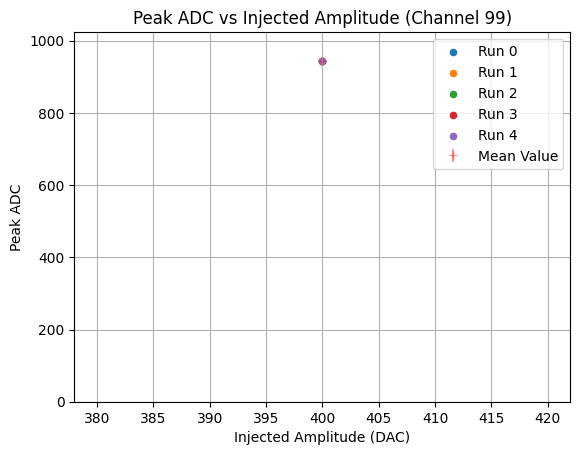

In [ ]:
# Define the channel to plot 
channel = 99
amplitude = 400

amplitudes, peaks = extract_peaks({amplitude: all_dirs[amplitude]}, channel, pedestals) 

# Converting amplitude to pC 
amplitudes_array = np.array(amplitudes) 
#amplitudes_pC = amplitudes_array*2.0752/1000 

# Standard deviation
peaks_np = np.array(peaks)
mean = peaks_np.mean()
std_dev = peaks_np.std()

# Plotting 
colors = np.random.rand(5)

fig=plt.figure() 
plt.errorbar(amplitude, mean, yerr=std_dev, fmt='+', color='red', linestyle="None", alpha=0.4, label='Mean Value')
for i in range(5):
    plt.scatter(amplitude, peaks_np[i], s=20, label=f'Run {i}')
plt.xlabel('Injected Amplitude (DAC)') 
plt.ylim(0, 1024)
plt.ylabel('Peak ADC') 
plt.legend()
plt.title(f'Peak ADC vs Injected Amplitude (Channel {channel})') 
plt.grid(True) 
plt.show() 
fig.savefig(f'/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/images/FPGA_{fpga}_pb{pb}/07_ADCpeak_vs_amplitude{amplitude}DAC_channel{channel}.png')


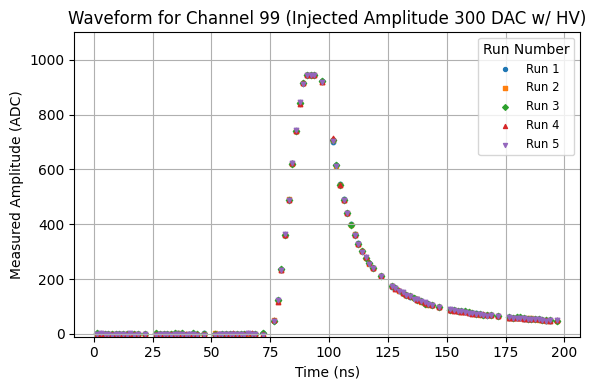

In [ ]:
# Specify the amplitude and channel you want to plot
injected_amplitude = 300  # Replace with the desired amplitude
channel = 99 # Replace with the desired channel

# Extract all the files for the specified amplitude
run_files = all_dirs.get(injected_amplitude, {})

# Check if the amplitude is valid
if not run_files:
    print(f"No files found for amplitude {injected_amplitude}")
    exit()

# Create a figure
plt.figure(figsize=(6, 4))

# Marker styles to cycle through
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'X', '1', '2', '3', '4', '|']
pedestals = 80

# Plot each run
for run, file_path in run_files.items():
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    
    # Read the data file
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()
    
    # Filter for the specified channel, excluding unwanted phases
    channel_data = df[(df['Channel'] == channel) & (~df['Phase'].isin([4, 6, 7]))]

    if not channel_data.empty:
        plt.scatter(channel_data['Time'], channel_data['ADC'] - pedestals,
                    label=f'Run {run + 1}',
                    marker=markers[run % len(markers)],
                    s=10)

# Customize the plot
plt.title(f'Waveform for Channel {channel} (Injected Amplitude {injected_amplitude} DAC w/ HV)')
plt.xlabel('Time (ns)')
plt.ylabel('Measured Amplitude (ADC)')
plt.ylim(-10, 1100)
plt.grid(True)
plt.legend(title="Run Number", fontsize='small', markerscale=0.9)
plt.tight_layout()
fig.savefig(f'/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/images/FPGA_{fpga}_pb{pb}/08_Channel{channel}-HV.png')
plt.show()


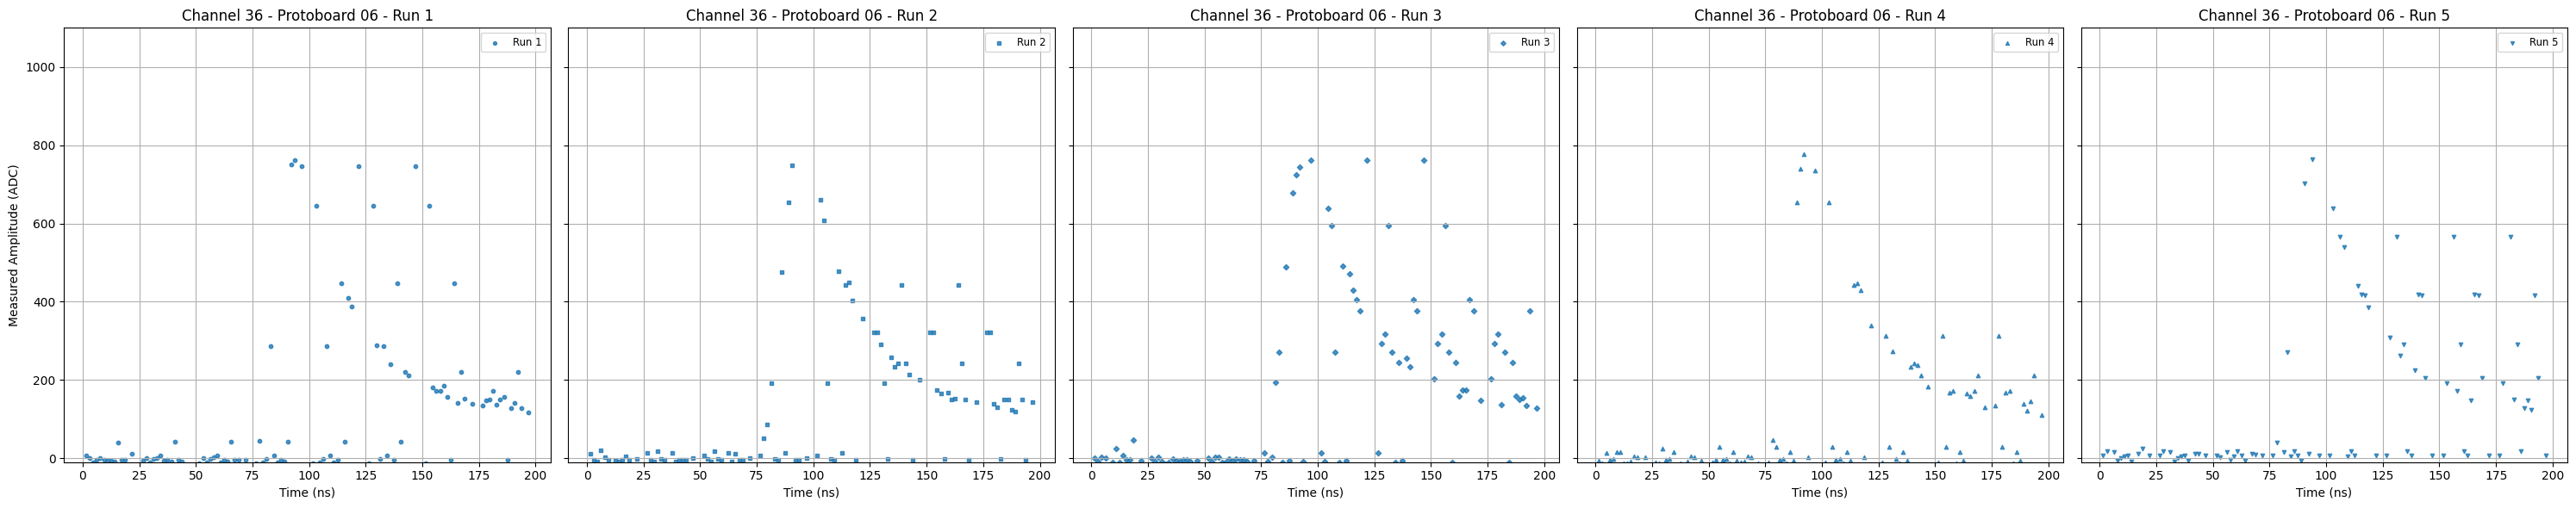

In [ ]:
# Specify the amplitude and channel you want to plot
injected_amplitude = 400  # Replace with the desired amplitude
channel = 36  # Replace with the desired channel

# Extract all the files for the specified amplitude
run_files = all_dirs.get(injected_amplitude, {})

# Create a figure with 5 separate canvases
fig, axs = plt.subplots(1, 5, figsize=(30, 6), sharey=True)

# Marker styles to cycle through
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'X', '1', '2', '3', '4', '|']
pedestals = 80

# Plot each run in a separate canvas
for run, file_path in run_files.items():
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    
    # Read the data file
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()
    
    # Filter for the specified channel, excluding unwanted phases
    channel_data = df[(df['Channel'] == channel) & (~df['Phase'].isin([4, 6, 7]))]

    if not channel_data.empty:
        # Plot on the corresponding axis
        ax = axs[run]
        ax.scatter(channel_data['Time'], channel_data['ADC'] - pedestals,
                   label=f'Run {run + 1}',
                   marker=markers[run % len(markers)],
                   s=10, alpha=0.8)
        
        # Customize the individual canvas
        ax.set_title(f'Channel {channel} - Protoboard 06 - Run {run + 1}')
        ax.set_xlabel('Time (ns)')
        ax.set_ylim(-10, 1100)
        ax.grid(True)
        ax.legend(fontsize='small', markerscale=0.9)

# Set common ylabel
axs[0].set_ylabel('Measured Amplitude (ADC)')

# Adjust layout and show the plot
plt.tight_layout()
fig.savefig(f'/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/images/FPGA_{fpga}_pb{pb}/Channel{channel}-{injected_amplitude}DAC-pb{pb}.png')
plt.show()


In [ ]:
std_dev


In [ ]:
fig = plt.figure(figsize=(12,6))

for i in range(10):
    filename = f'/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/images/FPGA_{fpga}_pb{pb}/Channel{channel}-{injected_amplitude}DAC-pb{pb}.png'
    filepath = dirs[200][i]+filename

    df = pd.read_csv(filepath)
    df.columns = df.columns.str.strip()
    plt.scatter(df['Time'], df['ADC Value'], label=f'Run{i}')

plt.title('ADC Value vs Time Channel 36')
plt.xlabel('Time (ns)')
plt.ylim(0,800)
plt.ylabel('ADC Value')
plt.legend()
plt.grid(True)
plt.show()
fig.savefig(f'/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/images/FPGA_{fpga}_pb{pb}/ADC_vs_Time_channel{channel}.png')


NameError: name 'dirs' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(12,6))

for i in range(10):
    filename = 'ADC_Channel_5.csv'
    filepath = dirs[750][i]+filename

    df = pd.read_csv(filepath)
    df.columns = df.columns.str.strip()
    plt.scatter(df['Time'], df['ADC Value'], label=f'Run{i}')

plt.title('ADC Value vs Time Channel 5')
plt.xlabel('Time (ns)')
plt.ylim(0,800)
plt.ylabel('ADC Value')
plt.legend()
plt.grid(True)
plt.show()
fig.savefig('ADC_vs_Time_channel5.png')


## Correct Phases

In [ ]:
all_dirs_tot


{400: {0: '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/400dac/inj_adc_samples_210_pb06_76_400_1.csv',
  1: '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/400dac/inj_adc_samples_210_pb06_76_400_2.csv',
  2: '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/400dac/inj_adc_samples_210_pb06_76_400_3.csv',
  3: '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/400dac/inj_adc_samples_210_pb06_76_400_4.csv',
  4: '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/400dac/inj_adc_samples_210_pb06_76_400_5.csv'},
 925: {0: '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/925dac/inj_adc_samples_210_pb06_76_925_1.csv',
  1: '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/925dac/inj_adc_samples_210_pb06_76_925_2.csv',
  2: '/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/925dac/inj_adc_samples_210_pb06_76_925_3.csv',
  3: '/home/eic/Documents/HGC

In [ ]:
# Load the CSV file
directory = all_dirs_tot
amplitudes = [400, 925, 1450, 1975, 2500]  # List of injected amplitudes

for injected_amplitude in amplitudes:
    # Extract the first run file for the specified amplitude
    file_path = next(iter(directory.get(injected_amplitude, {}).values()), None)
    df = pd.read_csv(file_path)

    # Constants
    sample_time_interval = 25.0
    phase_time_interval = sample_time_interval / 16.0
    phase_offset = 7

    # Compute the new Phase values
    df['Phase'] = ((df['Time'] % sample_time_interval) / phase_time_interval + phase_offset).astype(int) % 16

    # Optionally, save the updated DataFrame to a new file
    df.to_csv(f"/home/eic/Documents/HGCSoft/h2gcalib_3b/internalinjection/TOT_Test/{injected_amplitude}dac/inj_adc_samples_209_pb008_76_{injected_amplitude}_1.csv", index=False)
